# Data Description 

## Importing the Libraries

In [2]:
import pandas as pd                                # To perform data manipulation 
import numpy as np                                 # To perform some numerical operations 
import seaborn as sns                              # For visualization
import matplotlib.pyplot as plt                    # For Visualization
from warnings import filterwarnings                # To remove warnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)          # To display all the columns

## Importing Dataset

**Importing Train Data**

In [2]:
# "C:\Users\Hari\Documents\PGDA_31\PredictingTheStatusOfInterview\train_IA_-_train.csv"
#train=pd.read_csv('train_IA_-_train.csv')
train=pd.read_csv(r"C:\Users\Hari\Documents\PGDA_31\PredictingTheStatusOfInterview\train_IA_-_train.csv")
train.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


**Importing Test Data**

In [3]:
# "C:\Users\Hari\Documents\PGDA_31\PredictingTheStatusOfInterview\test_IA_-_test.csv"
#test=pd.read_csv('test_IA_-_test.csv')
test=pd.read_csv(r"C:\Users\Hari\Documents\PGDA_31\PredictingTheStatusOfInterview\test_IA_-_test.csv")
test.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


**Let we check whether the data is balanced or not**

In [4]:
train.Status.value_counts(normalize=True)*100

Consider        39.872326
May Consider    32.608696
Not Consider    27.518979
Name: Status, dtype: float64

**The data is almost balanced So need not to perform any oversampling technique like SMOTE[Synthetic Minority OverSampling Technique]**

### Let check the Shape of the train and test data 

In [5]:
print(train.shape,test.shape)

(5800, 27) (1200, 26)


### Now let we check the statistical information for the train and test data

In [6]:
train.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.800000e+03,5.800000e+03,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,4.947029e+11,5.009458e+09,229.553448,0.748321,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,55.175862,47.250690,8.019655,10.503621,4.507586,50.315517,37.306724
std,2.890097e+11,2.873886e+09,22.884836,0.144272,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,20.373655,24.891818,4.311379,5.724640,1.690976,28.696299,13.298407
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.423758e+11,2.513537e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.900364e+11,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.456835e+11,7.468382e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [7]:
train.describe(include='object')

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask,Status
count,5800,5799,5797,5799,5800,5799,5796
unique,10,3,3,2,2,2,3
top,Developer,Negative,Neutral,No,No,Yes,Consider
freq,618,2004,1971,2911,2936,2955,2311


In [8]:
test.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1199.000000,1200.000000,1200.000000,1200.000000,1200.000000,1199.000000,1200.000000,1200.000000,1200.000000,1198.000000,1200.000000,1200.000000,1199.000000,1199.000000,1199.000000,1200.000000
mean,4.951812e+11,4.903072e+09,229.083333,0.737750,0.262369,70.198333,79.442500,81.379167,45.013333,151.909091,304.809167,37.472500,37.708333,54.627713,48.069167,7.801667,10.720601,4.368641,50.250209,37.735833
std,2.912734e+11,2.842862e+09,22.273598,0.144385,0.144387,29.114006,23.094469,23.088517,14.597228,86.738285,175.226529,18.941134,19.190975,20.667313,24.360122,4.397171,5.731281,1.685413,29.361385,13.364688
min,1.412138e+09,6.798856e+06,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.398708e+11,2.452782e+09,210.000000,0.610000,0.140000,44.750000,59.000000,62.000000,32.000000,80.000000,152.000000,21.750000,20.000000,37.000000,28.000000,4.000000,6.000000,3.000000,24.000000,26.000000
50%,4.956274e+11,5.064949e+09,229.000000,0.740000,0.260000,71.000000,79.000000,81.000000,45.000000,151.000000,306.000000,37.000000,39.000000,54.000000,48.000000,8.000000,11.000000,4.000000,50.000000,38.000000
75%,7.475468e+11,7.245047e+09,247.250000,0.860000,0.390000,96.000000,99.000000,102.000000,57.000000,228.000000,455.250000,54.000000,54.000000,72.000000,69.000000,12.000000,16.000000,6.000000,76.000000,50.000000
max,9.992747e+11,9.996226e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,599.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [9]:
test.describe(include='object')

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask
count,1200,1198,1198,1198,1200,1200
unique,10,3,3,2,2,2
top,Account Manager,Negative,Positive,No,Yes,Yes
freq,133,409,412,600,613,600


## Let we check for Null Values for both Train and Test data

In [10]:
train_missvals=train.isnull().sum()
train_missvals[train_missvals>0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
Status               4
dtype: int64

In [11]:
test_missvals=test.isnull().sum()
test_missvals[test_missvals>0]

S.L.R.I              1
L.J.T.C              1
S.P.I                2
L.A.I                1
Q.A                  1
P.E.I                2
P.E.C                2
COMPLIANCE Ratio     1
Interviewer Intro    2
dtype: int64

**Here we have only few Missing values in both train and test data so we can impute numerical missing values by using Median and impute categorical missing values by using Mode**

## Let check the information of the train and test data

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   int64  
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

## Checking for Duplicated Data in both train and test

In [14]:
train[train.duplicated()]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status


In [15]:
test[test.duplicated()]

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask


**Their is no duplicated records in both train and test data**

## Now will Seprate all Numerical and categorical data

### For Train Data

In [16]:
num_val_train=train.select_dtypes(exclude='object')
num_val_train.head(3)

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,6.913030e+11,2.655774e+09,194,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,98,37
1,9.214326e+11,7.123846e+08,234,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,54,33
2,4.718839e+10,8.445533e+08,267,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,31,58


In [17]:
cat_val_train=train.select_dtypes(include='object')
cat_val_train.head(3)

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask,Status
0,Developer,Neutral,Neutral,No,Yes,Yes,Consider
1,Sales,Neutral,Negative,No,No,Yes,Consider
2,Program Manager,Positive,Positive,No,Yes,No,Consider


### For Test Data

In [18]:
num_val_test=test.select_dtypes(exclude='object')
num_val_test.head(3)

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
0,702127796635,2.381365e+09,229,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,24.0,49
1,613490569071,8.428514e+08,194,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,99.0,24
2,759998772623,7.681665e+09,266,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,16.0,16


In [19]:
cat_val_test=test.select_dtypes(include='object')
cat_val_test.head(3)

,Profile,P.E.I,P.E.C,Interviewer Intro,Candidate into,Opp to ask
0,Product Manager,Positive,Negative,Yes,Yes,Yes
1,Product Manager,Positive,Neutral,No,Yes,Yes
2,QA Automation,Negative,Positive,Yes,No,Yes


## Now Lets Do some Visualization and get some insights from the data 

Interview Id


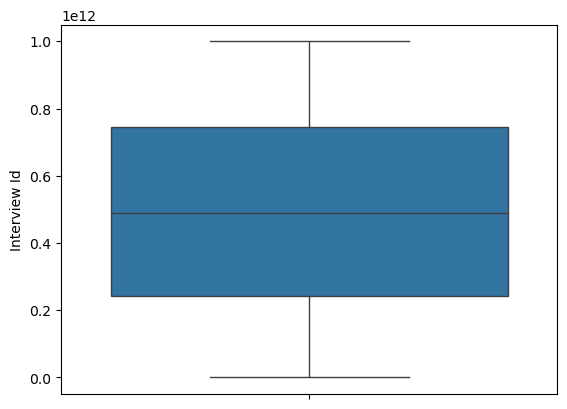

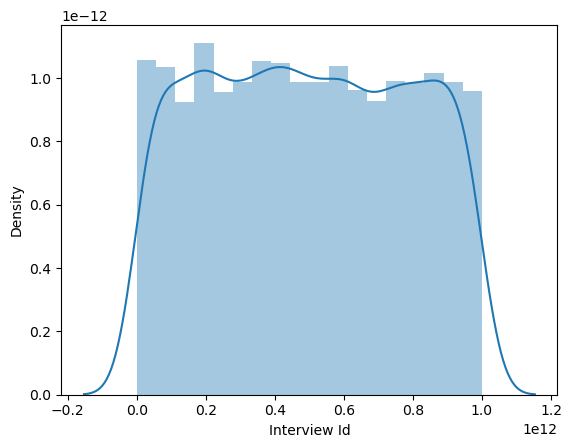

Candidate Id


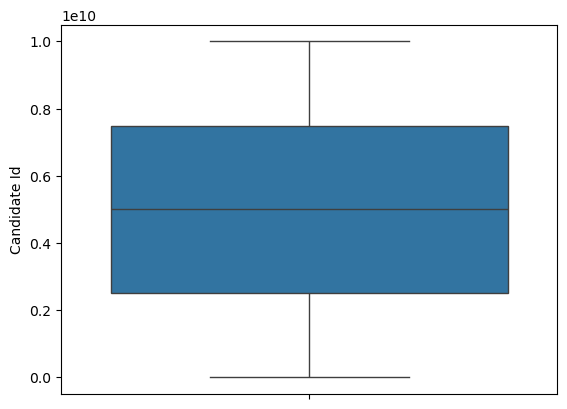

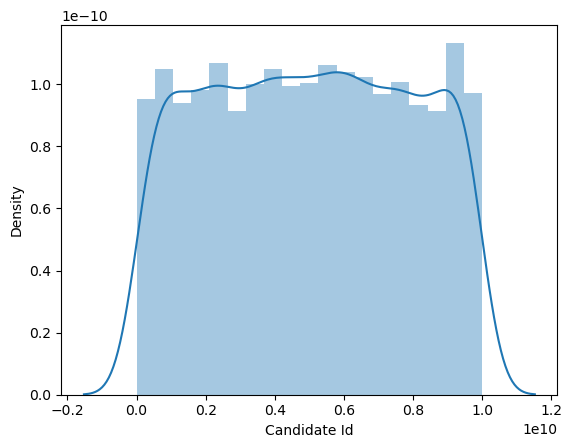

Interviewer Id


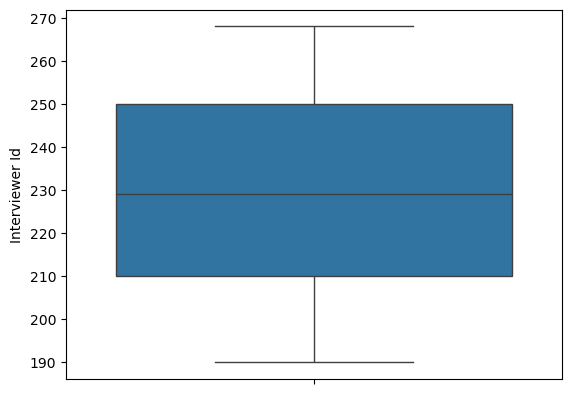

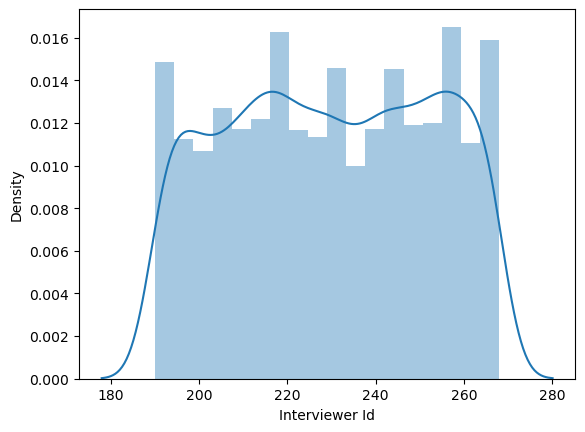

S.L.R.C


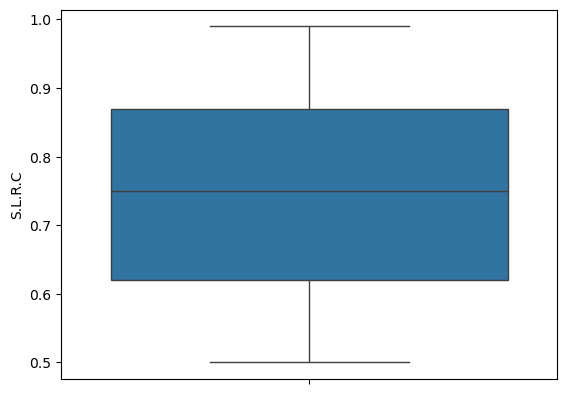

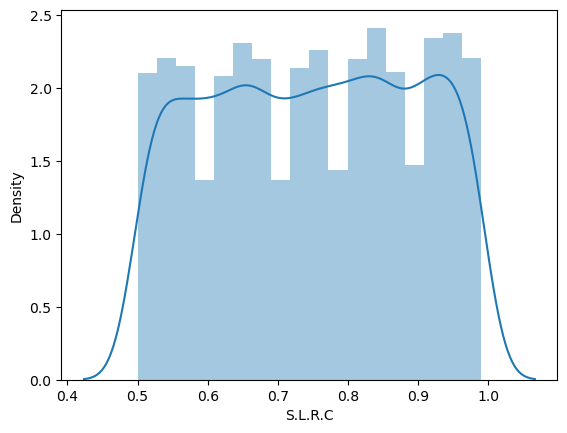

S.L.R.I


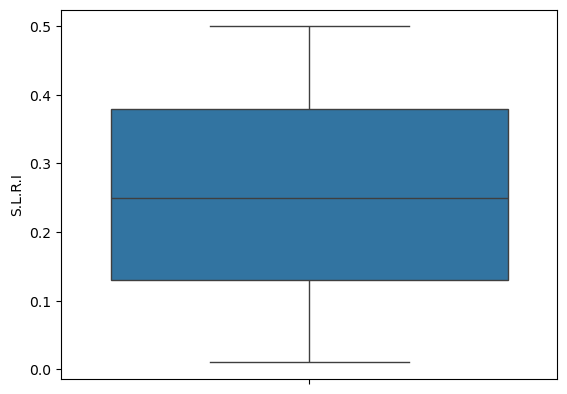

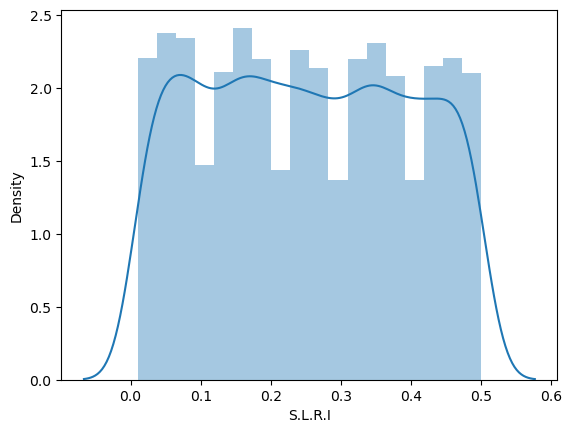

A.T.T


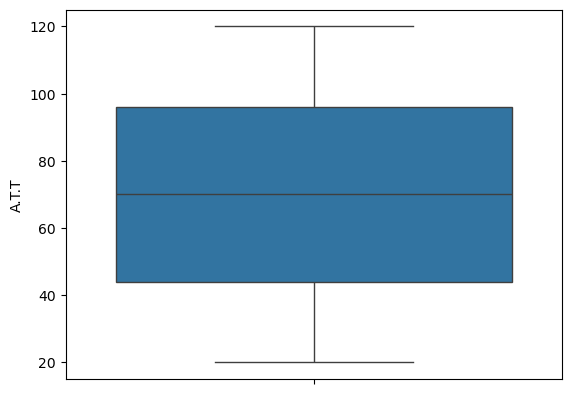

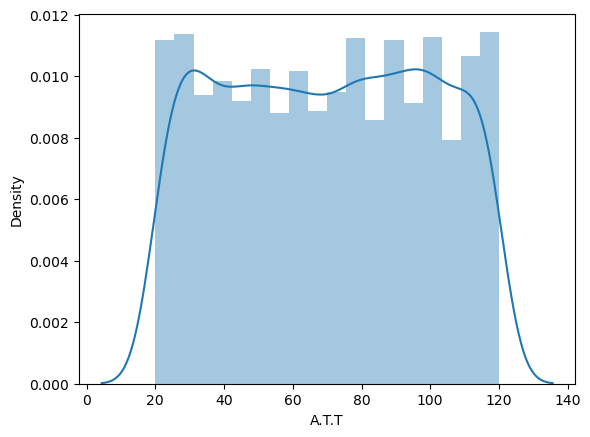

L.M.I


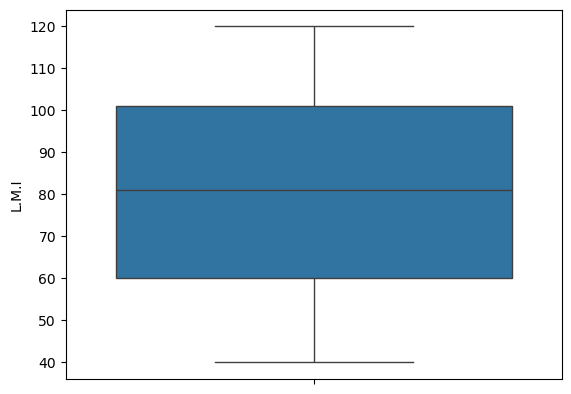

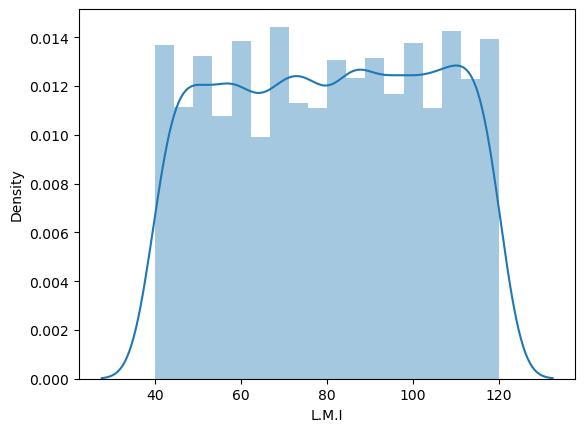

L.M.C


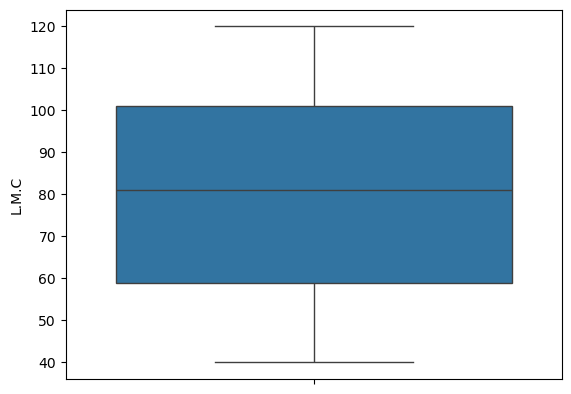

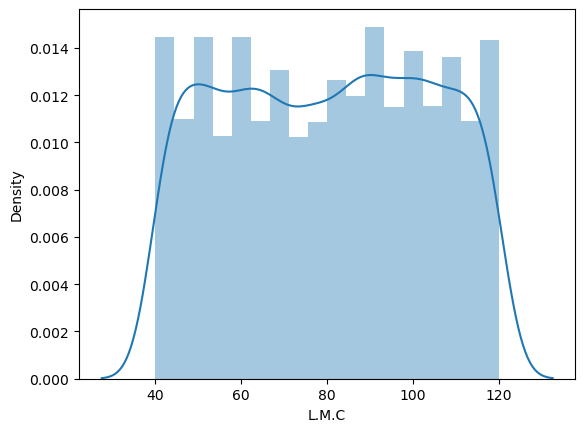

S.R


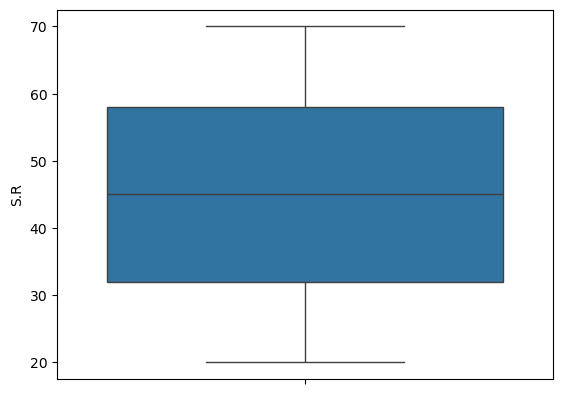

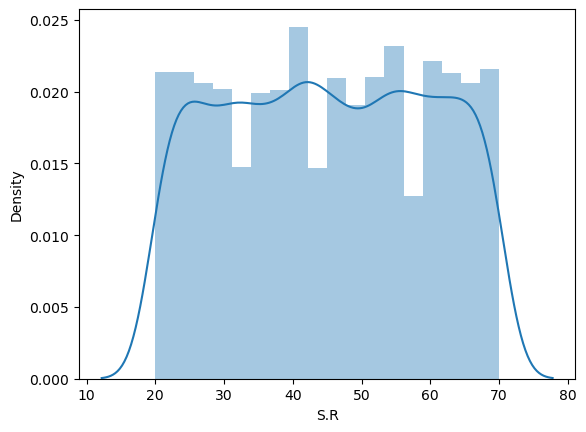

L.J.T.C


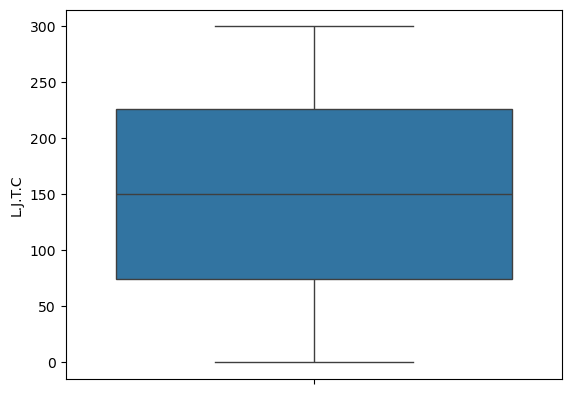

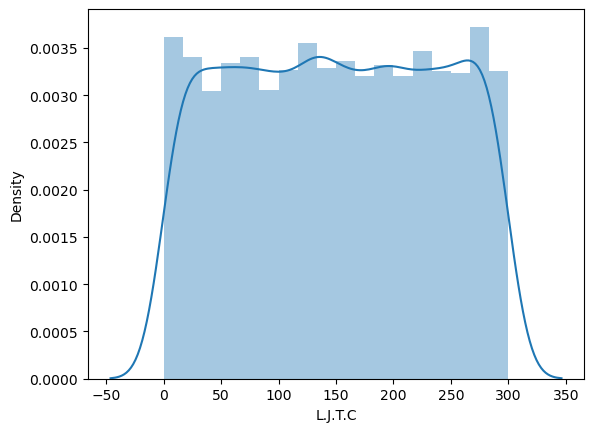

L.J.T.I


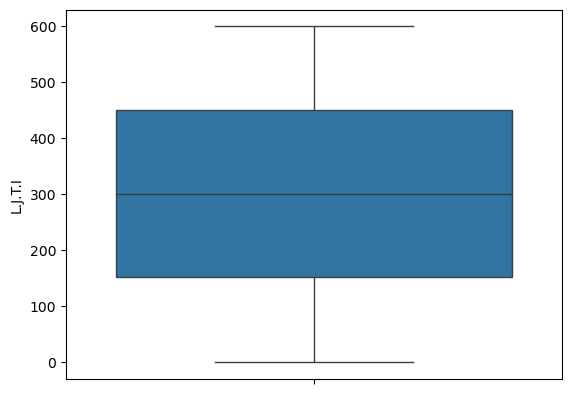

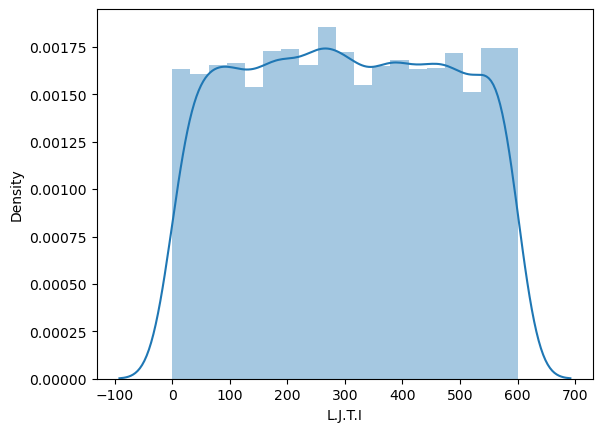

N.I.C


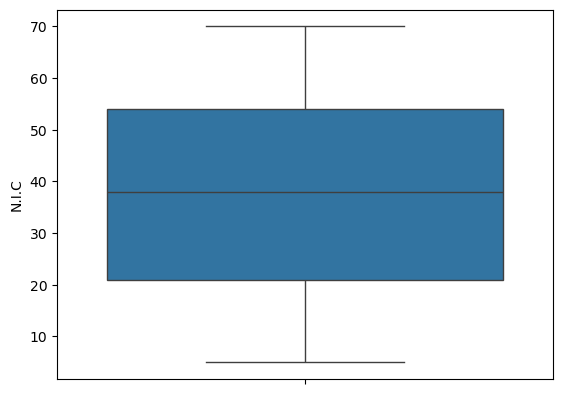

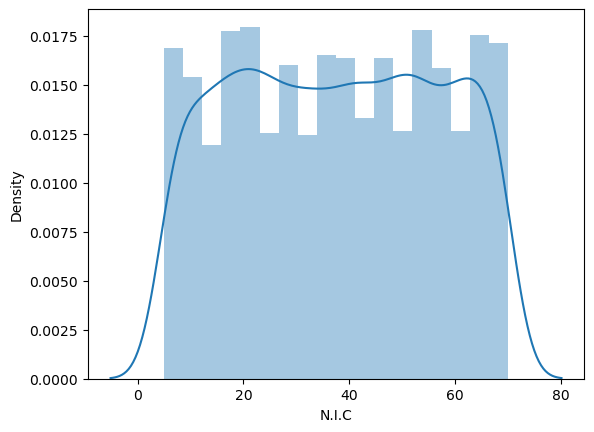

N.I.I


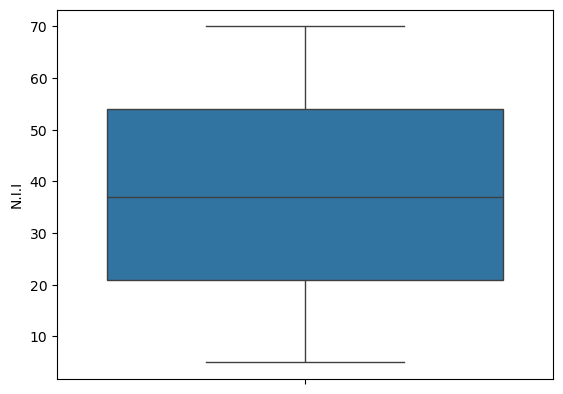

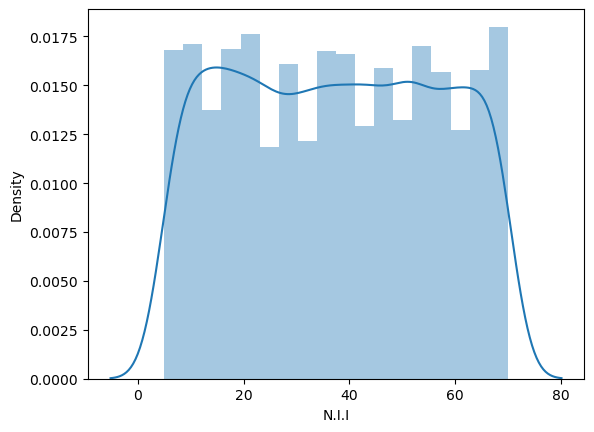

S.P.I


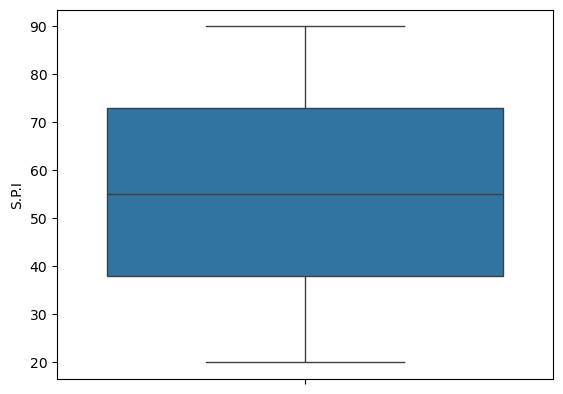

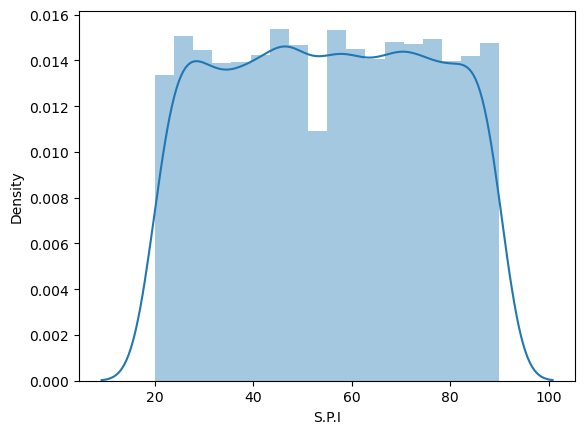

S.P.C


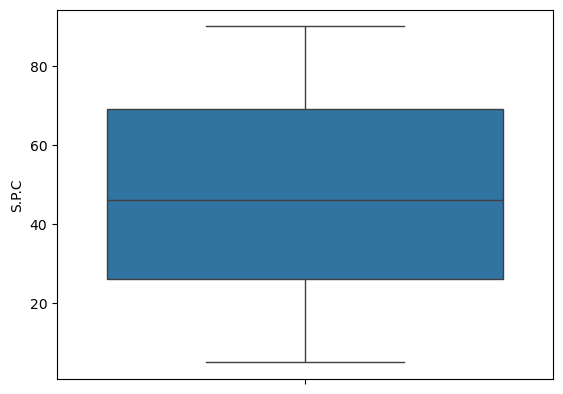

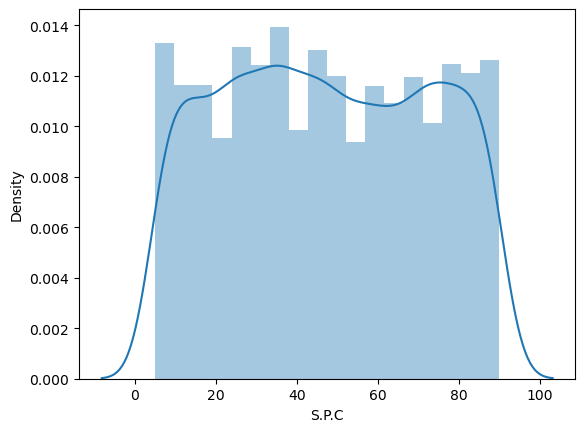

L.A.C


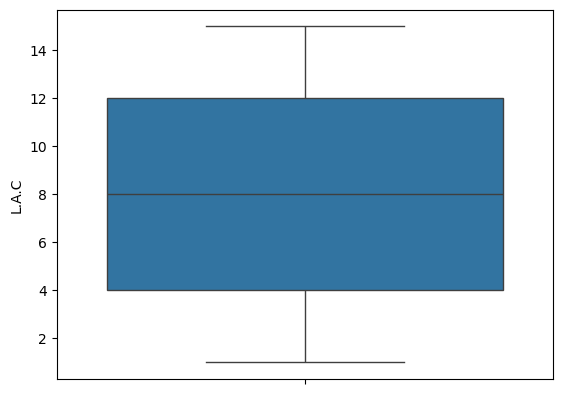

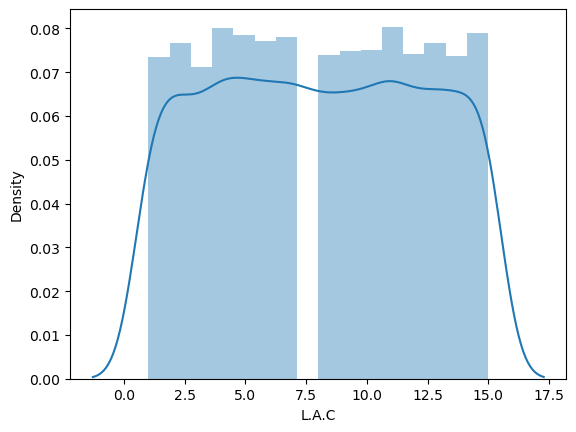

L.A.I


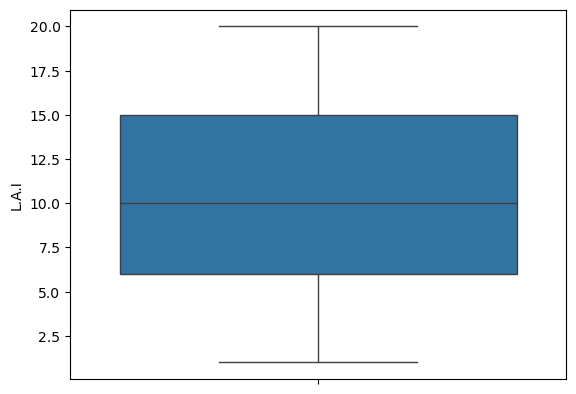

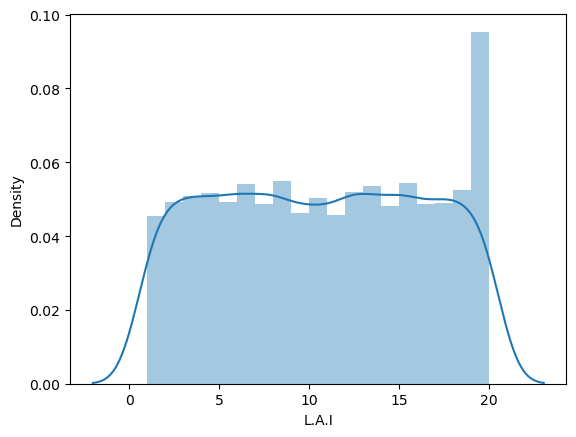

Q.A


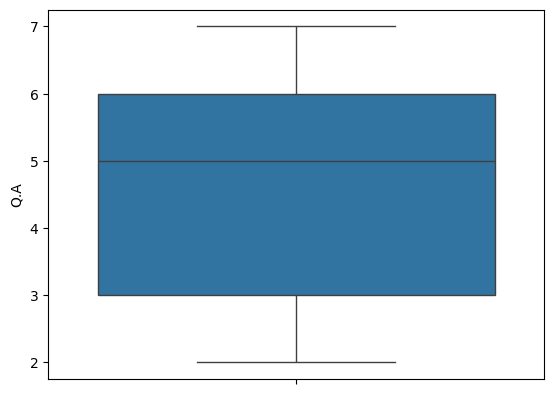

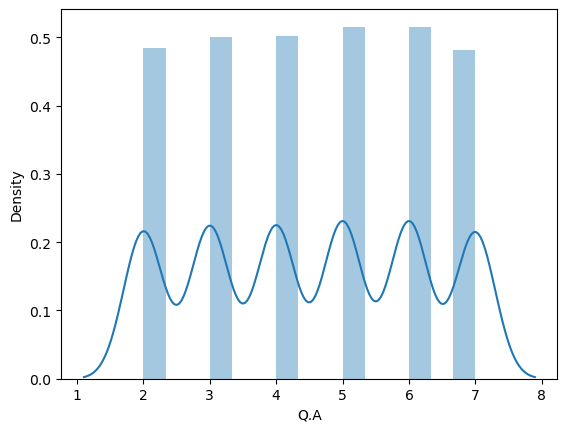

COMPLIANCE Ratio


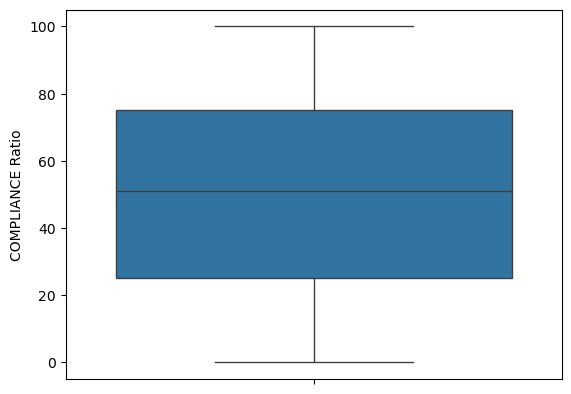

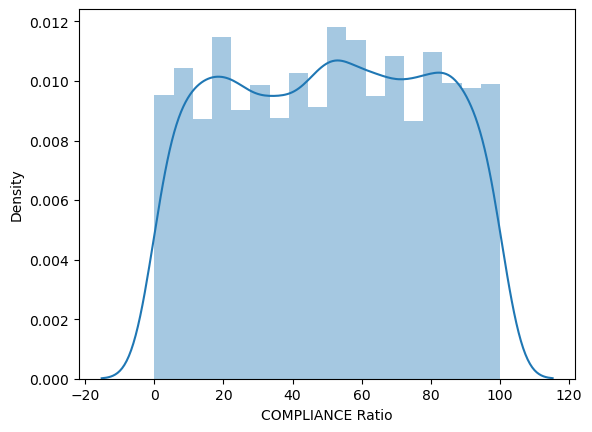

Interview duration


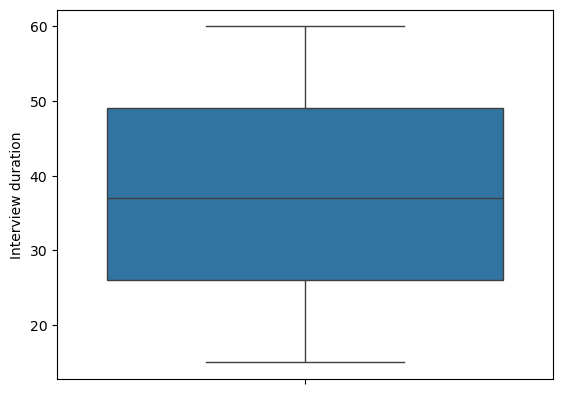

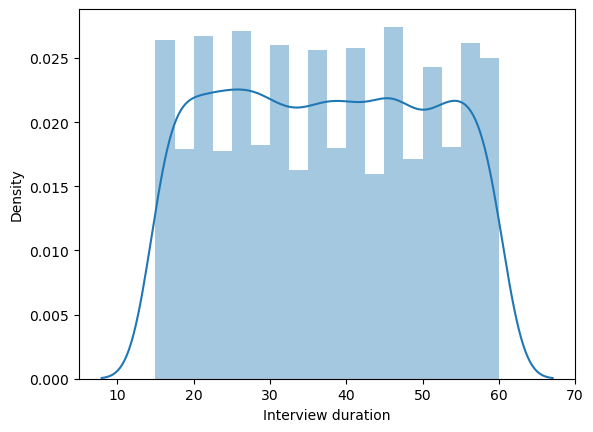

In [20]:
for i in num_val_train:
    print(i)
    sns.boxplot(train[i])
    plt.show()
    sns.distplot(train[i])
    plt.show()

Interview Id


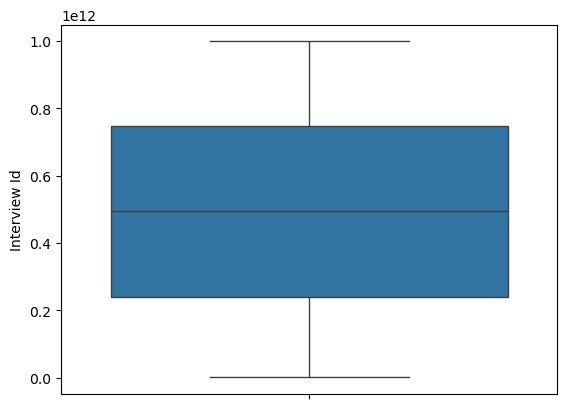

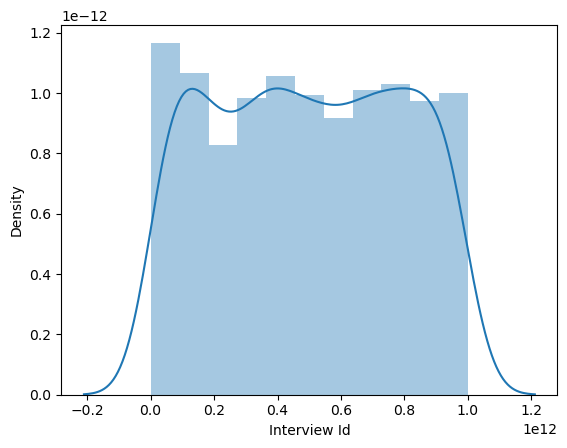

Candidate Id


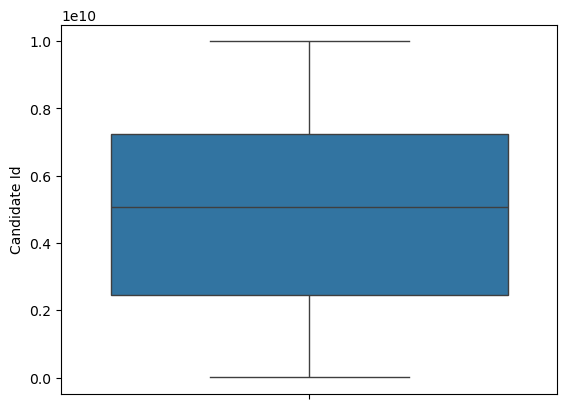

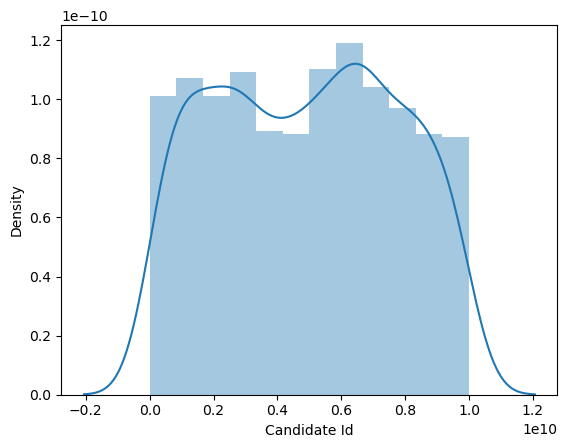

Interviewer Id


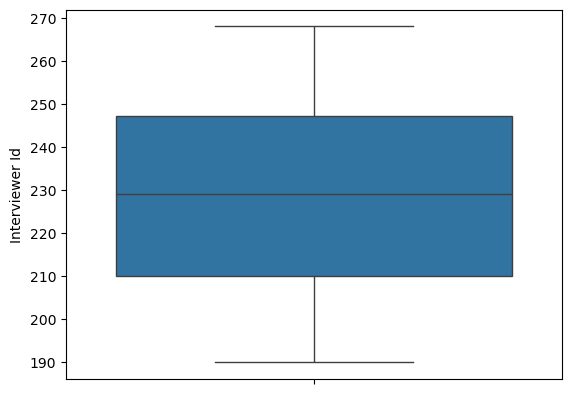

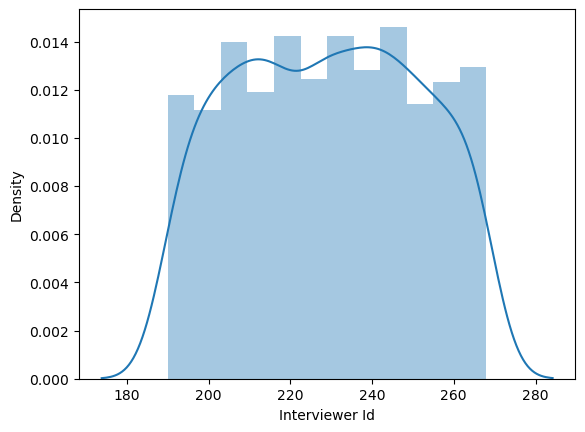

S.L.R.C


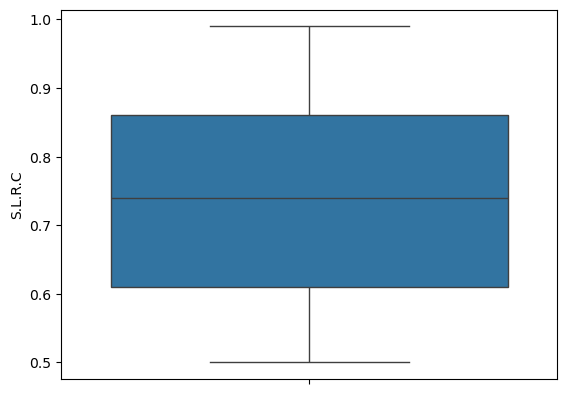

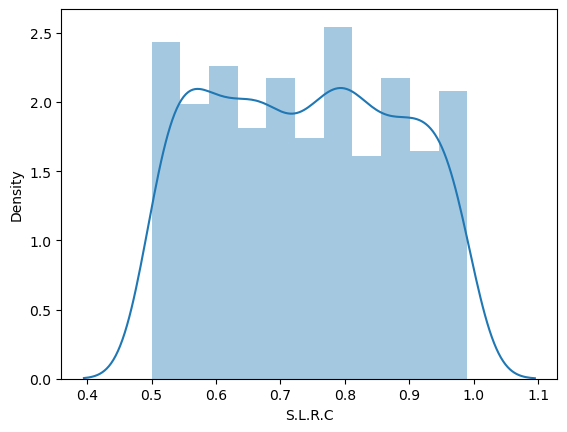

S.L.R.I


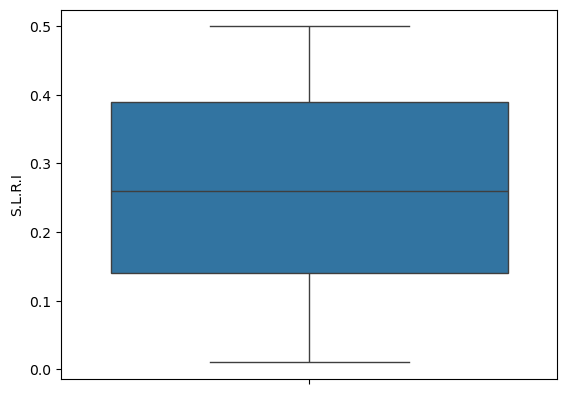

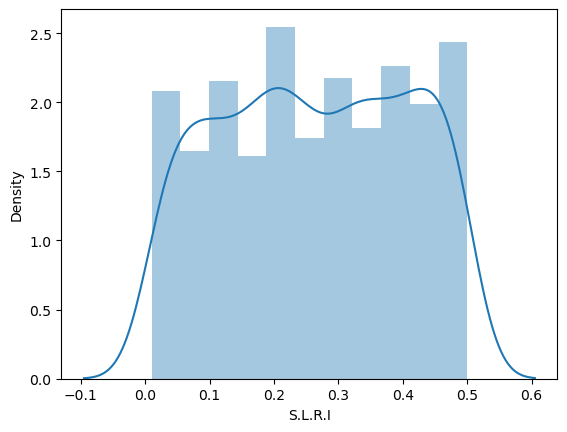

A.T.T


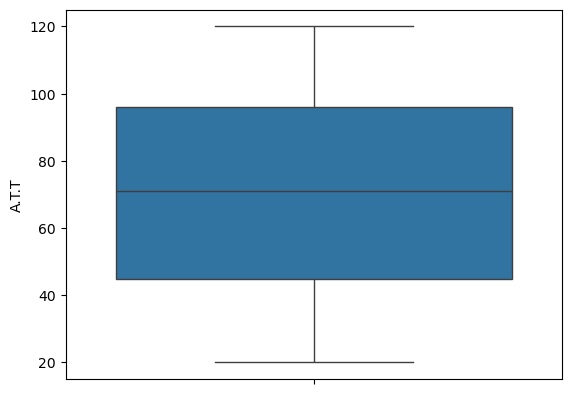

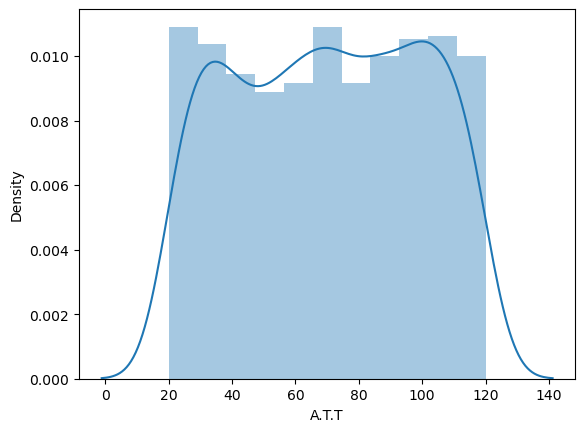

L.M.I


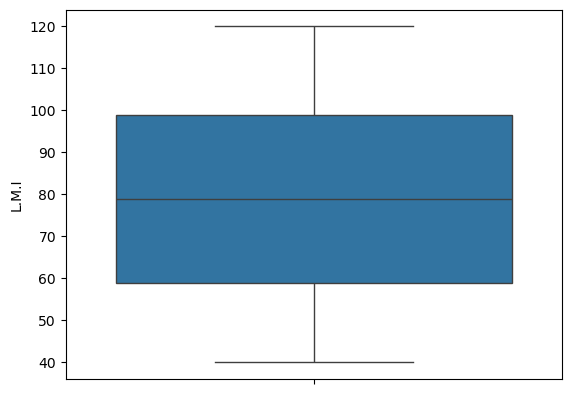

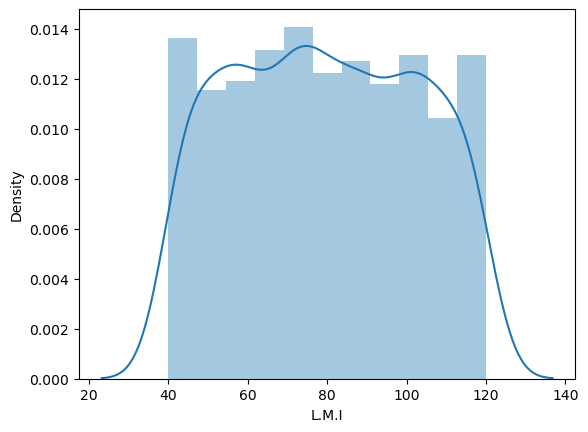

L.M.C


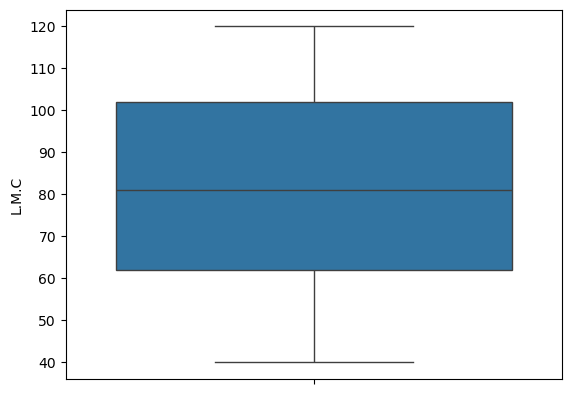

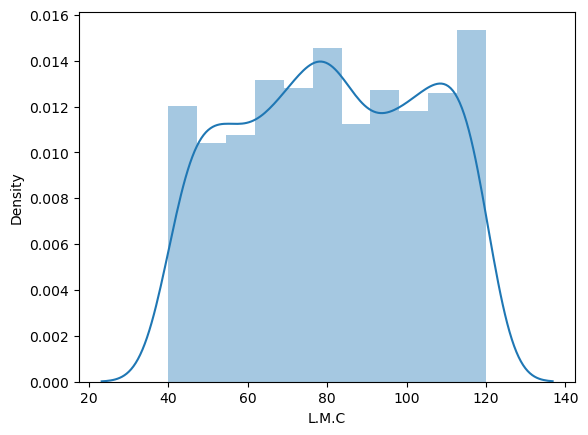

S.R


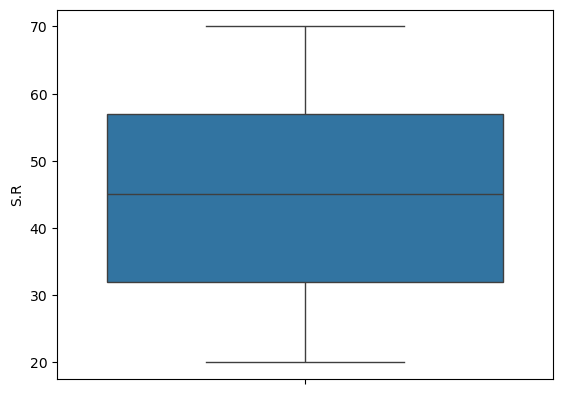

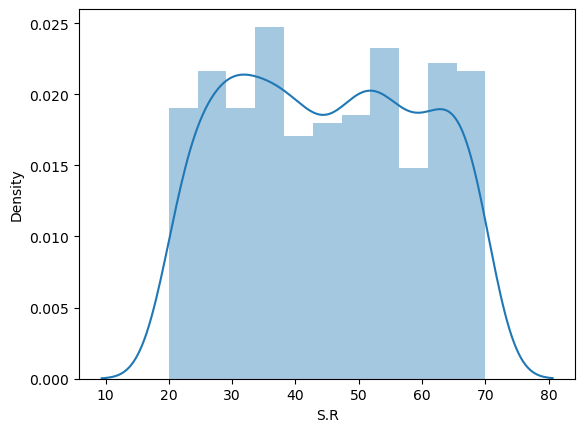

L.J.T.C


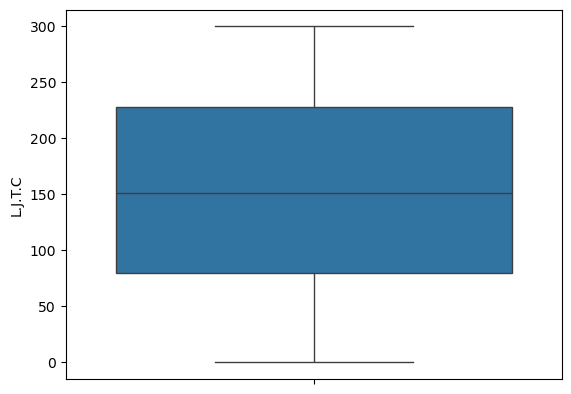

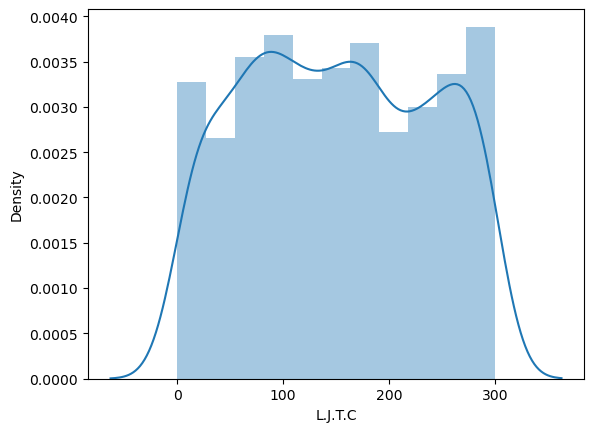

L.J.T.I


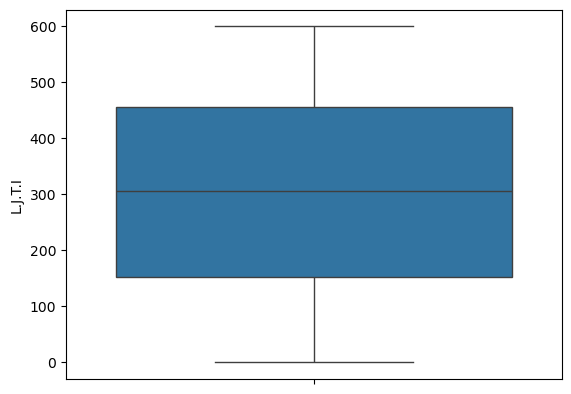

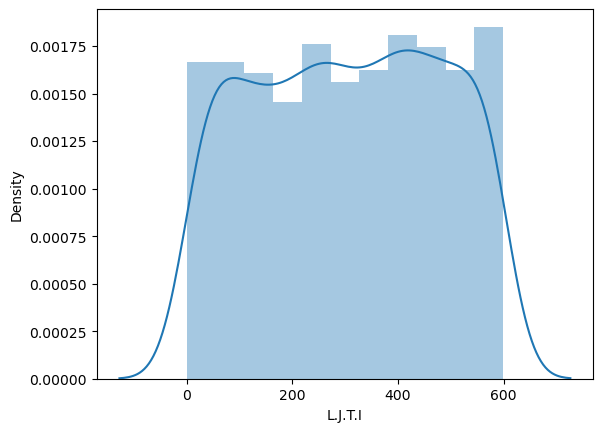

N.I.C


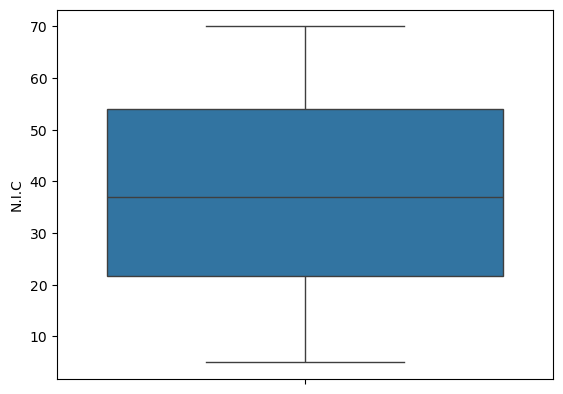

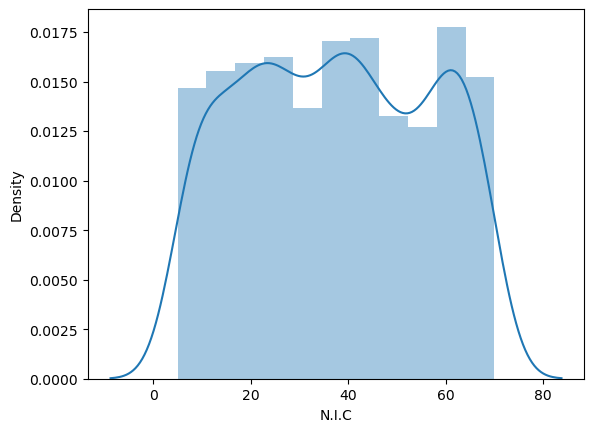

N.I.I


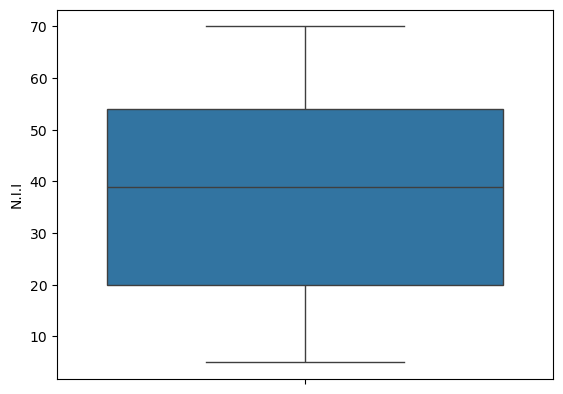

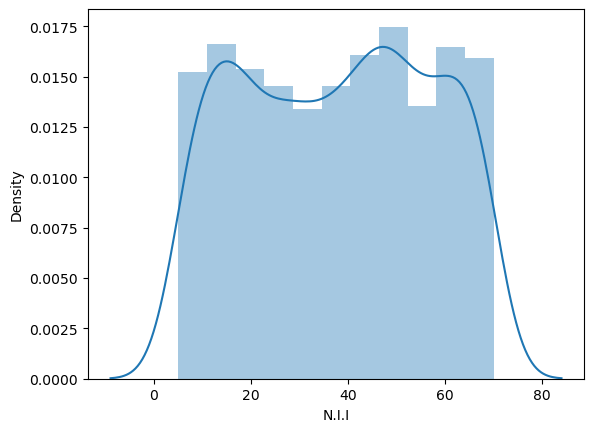

S.P.I


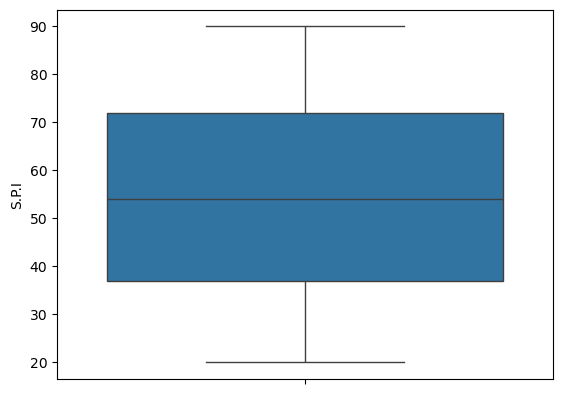

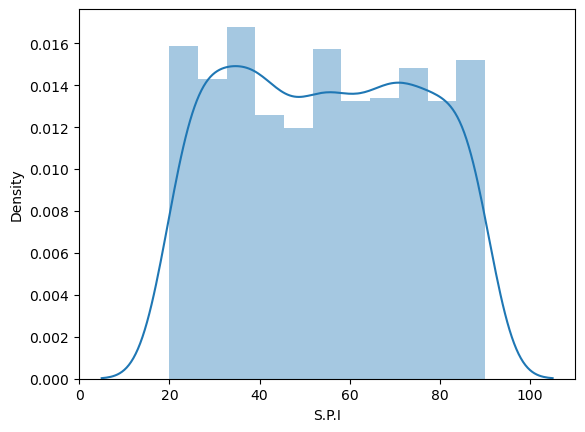

S.P.C


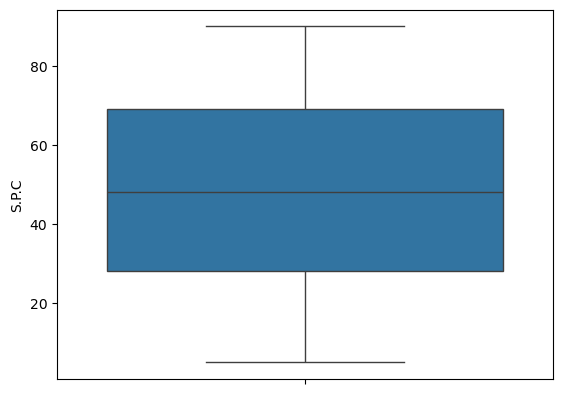

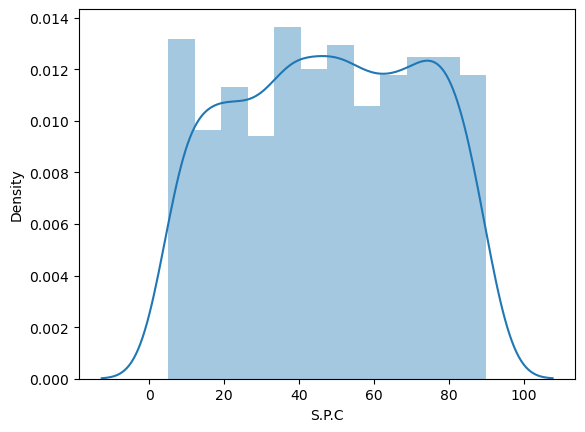

L.A.C


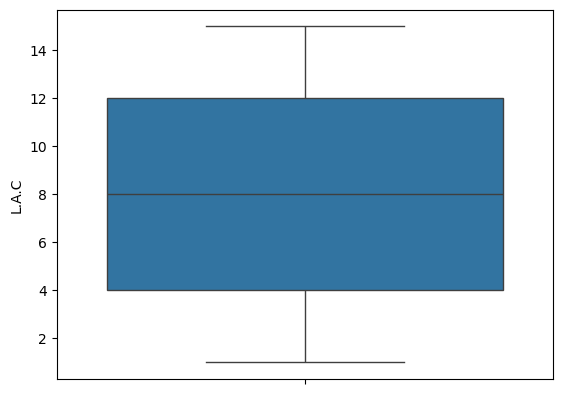

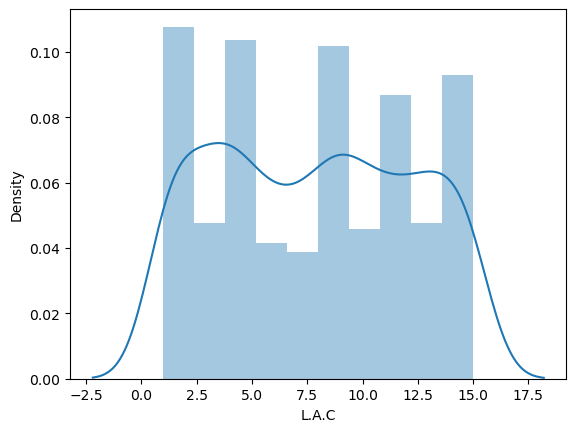

L.A.I


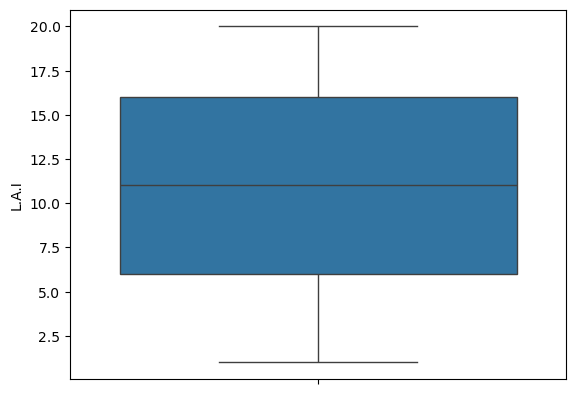

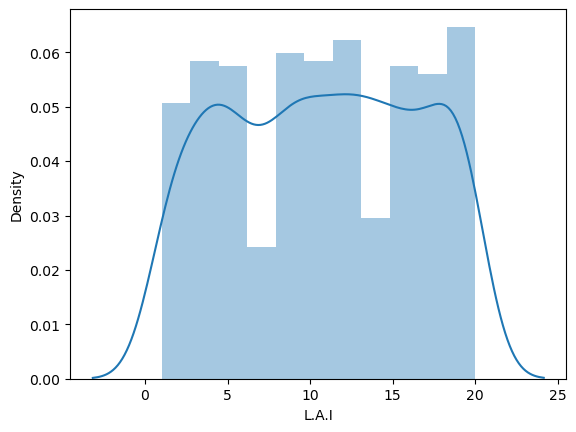

Q.A


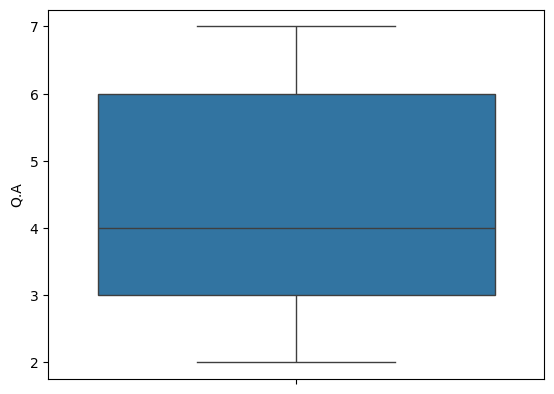

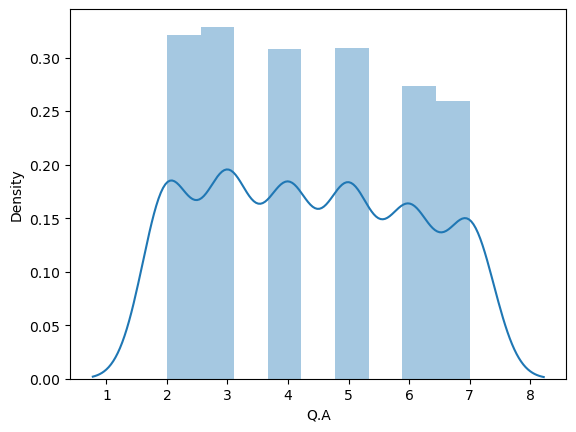

COMPLIANCE Ratio


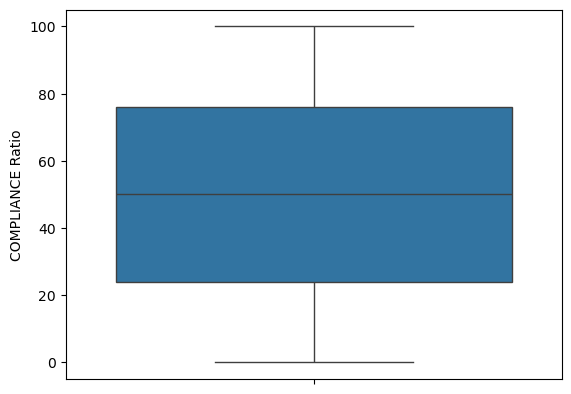

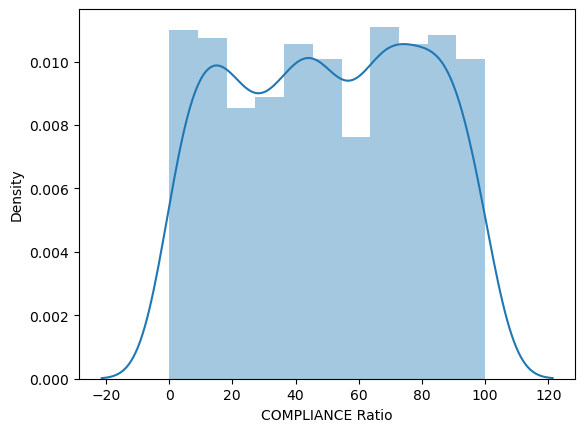

Interview duration


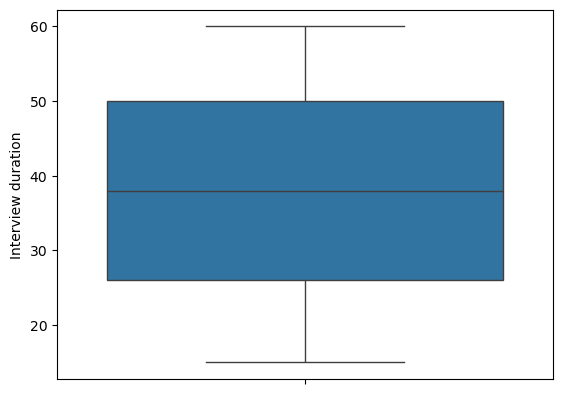

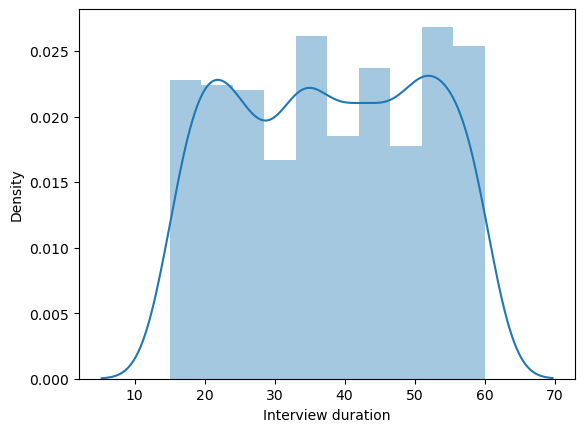

In [21]:
for i in num_val_test:
    print(i)
    sns.boxplot(test[i])
    plt.show()
    sns.distplot(test[i])
    plt.show()

Their is no outliers in the data, All the features are normaly distributed 

In [22]:
inter=train['Interviewer Id'].value_counts()

In [23]:
for i in inter.index:
    print(i)
    print(train[train['Interviewer Id']==i].Status.value_counts())

218
Consider        36
Not Consider    32
May Consider    27
Name: Status, dtype: int64
216
Consider        46
May Consider    25
Not Consider    21
Name: Status, dtype: int64
241
Consider        34
May Consider    28
Not Consider    28
Name: Status, dtype: int64
264
Consider        36
May Consider    30
Not Consider    23
Name: Status, dtype: int64
215
Consider        41
May Consider    26
Not Consider    21
Name: Status, dtype: int64
255
Consider        32
May Consider    29
Not Consider    27
Name: Status, dtype: int64
257
Consider        37
May Consider    34
Not Consider    15
Name: Status, dtype: int64
223
May Consider    33
Consider        33
Not Consider    20
Name: Status, dtype: int64
190
Consider        35
May Consider    26
Not Consider    25
Name: Status, dtype: int64
266
May Consider    35
Not Consider    26
Consider        24
Name: Status, dtype: int64
247
Consider        34
May Consider    26
Not Consider    24
Name: Status, dtype: int64
238
May Consider    34
Consider 

A single Interviewer has taken many of the interview and the status has same number of propotion details

### Will check for categorical data

Profile
['Developer' 'Sales' 'Program Manager' 'Marketing' 'QA Automation'
 'Account Manager' 'Data Scientist' 'Product Manager' 'QA Manual' 'HR']
Number of unique values = 10


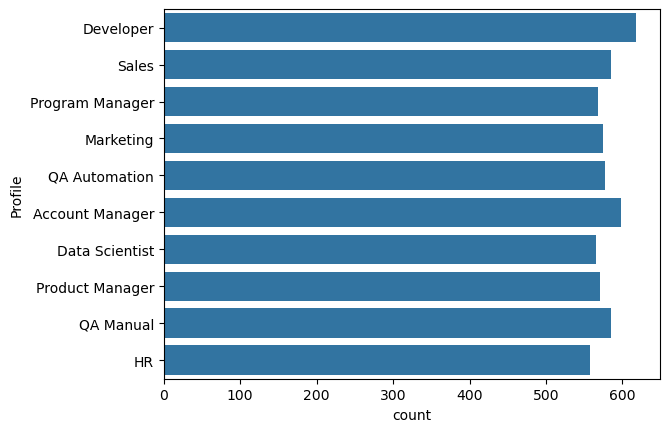

P.E.I
['Neutral' 'Positive' 'Negative' nan]
Number of unique values = 3


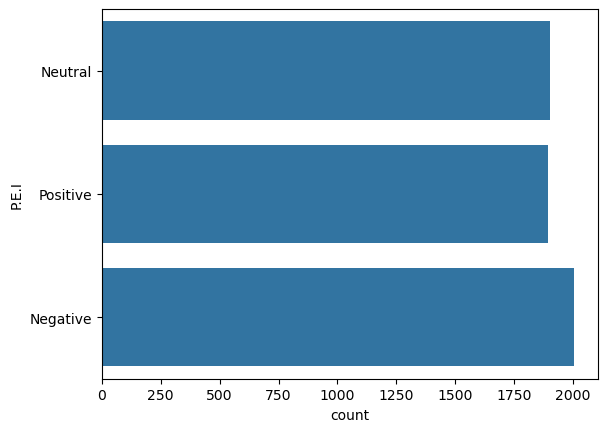

P.E.C
['Neutral' 'Negative' 'Positive' nan]
Number of unique values = 3


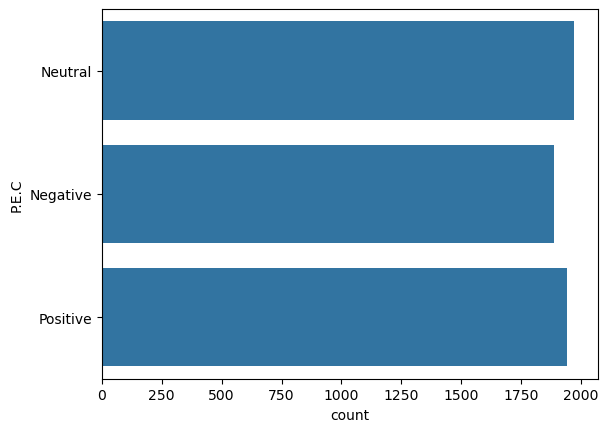

Interviewer Intro
['No' 'Yes' nan]
Number of unique values = 2


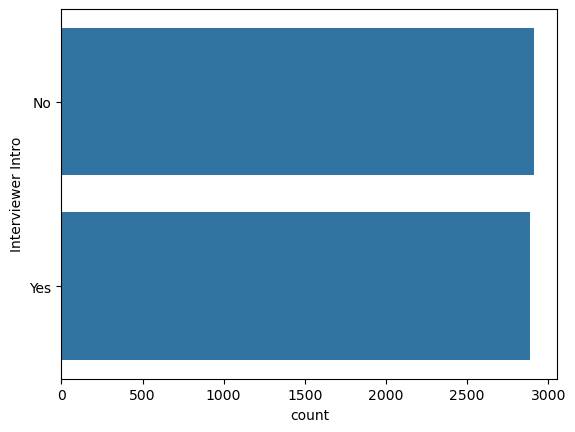

Candidate into
['Yes' 'No']
Number of unique values = 2


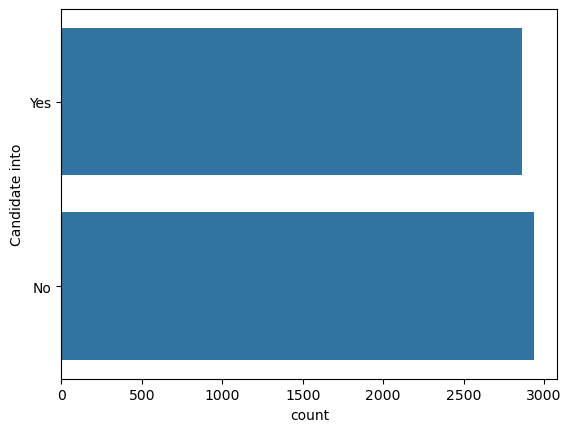

Opp to ask
['Yes' 'No' nan]
Number of unique values = 2


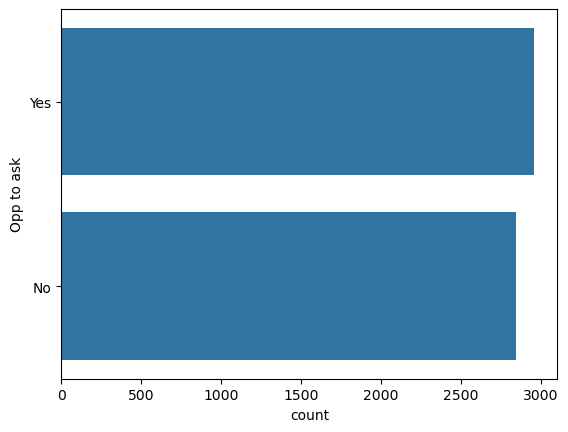

Status
['Consider' 'May Consider' 'Not Consider' nan]
Number of unique values = 3


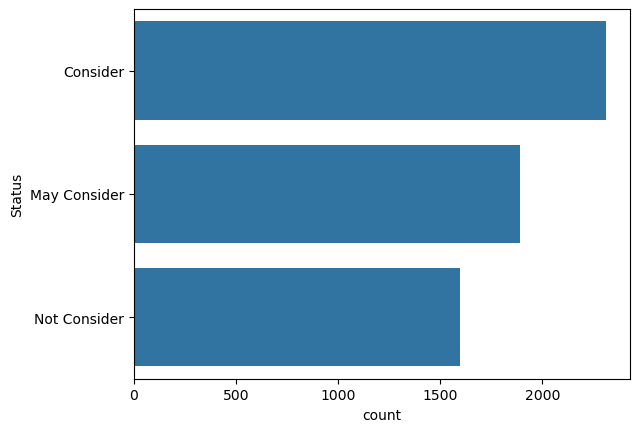

In [24]:
for i in cat_val_train:
    print(i)
    print(train[i].unique())
    print('Number of unique values =',train[i].nunique())
    sns.countplot(train[i])
    plt.show()

Profile
['Developer' 'Sales' 'Program Manager' 'Marketing' 'QA Automation'
 'Account Manager' 'Data Scientist' 'Product Manager' 'QA Manual' 'HR']
Number of unique values = 10


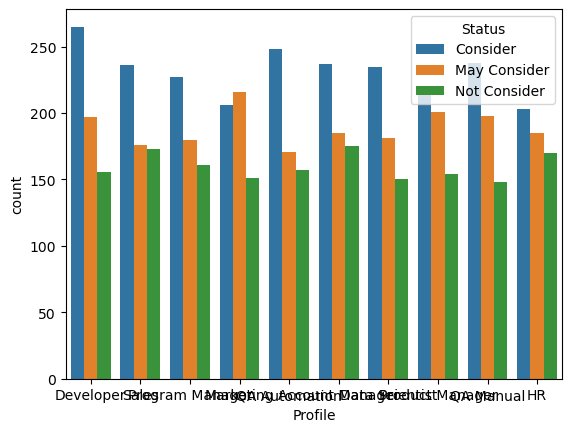

P.E.I
['Neutral' 'Positive' 'Negative' nan]
Number of unique values = 3


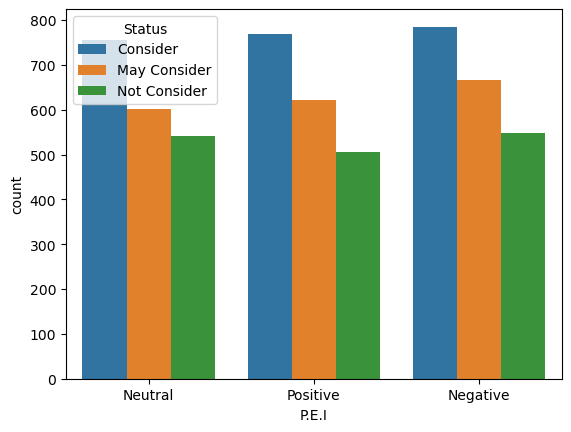

P.E.C
['Neutral' 'Negative' 'Positive' nan]
Number of unique values = 3


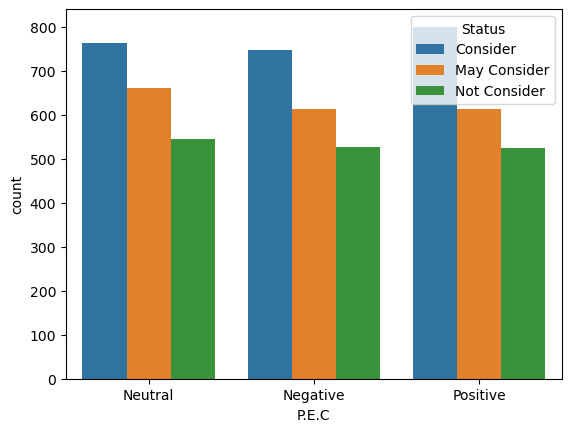

Interviewer Intro
['No' 'Yes' nan]
Number of unique values = 2


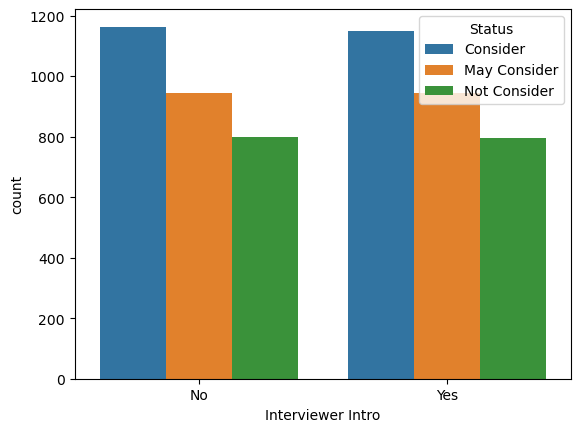

Candidate into
['Yes' 'No']
Number of unique values = 2


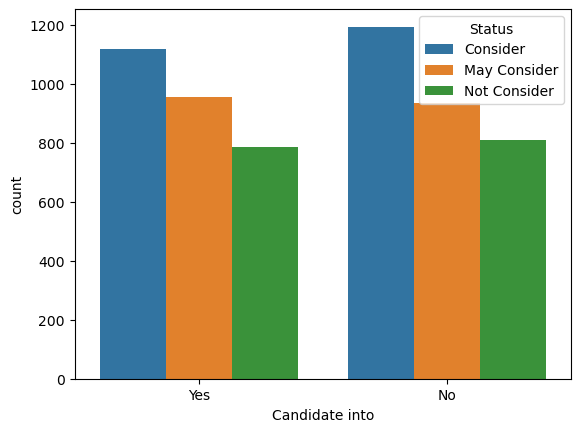

Opp to ask
['Yes' 'No' nan]
Number of unique values = 2


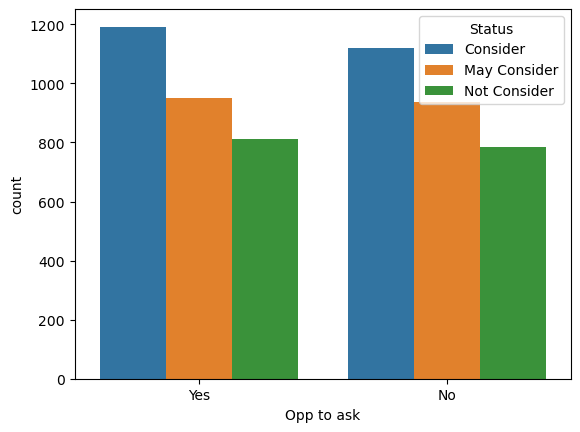

Status
['Consider' 'May Consider' 'Not Consider' nan]
Number of unique values = 3


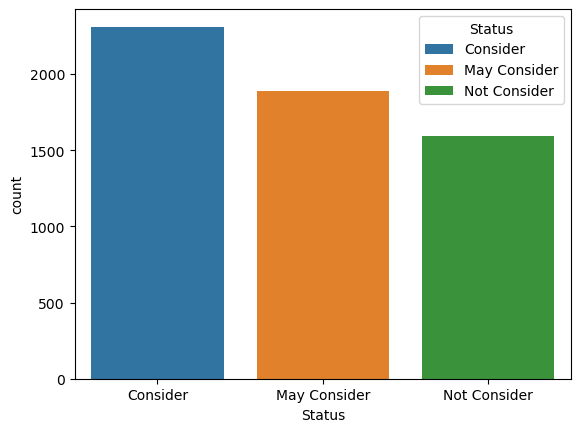

In [25]:
for i in cat_val_train:
    print(i)
    print(train[i].unique())
    print('Number of unique values =',train[i].nunique())
    sns.countplot(x=train[i],hue=train['Status'])
    plt.show()

<Axes: xlabel='Q.A', ylabel='count'>

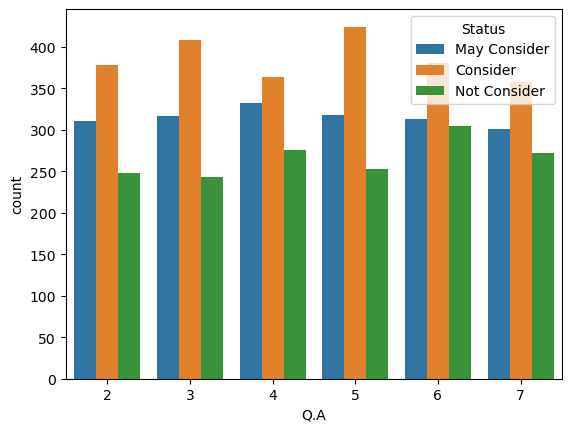

In [26]:
sns.countplot(x=train['Q.A'],hue=train['Status'])

## Missing Values Treatment

In [27]:
# Treating the missing values using mode for the train data 
for column in train:
    if train[column].isnull().any():
            train[column]=train[column].fillna(train[column].mode()[0])

In [28]:
# Treating the missing values using mode for the categorical data and median for numerical data
for column in test:
    if test[column].isnull().any():
        if(column in cat_val_test):
            test[column]=test[column].fillna(test[column].mode()[0])
        else:
            test[column]=test[column].fillna(test[column].median())

In [29]:
train_miss=train.isnull().sum()
train_miss[train_miss>0]

Series([], dtype: int64)

In [30]:
test_miss=test.isnull().sum()
test_miss[test_miss>0]

Series([], dtype: int64)

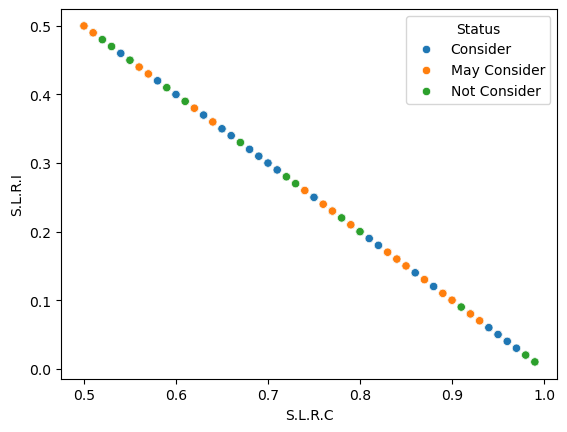

In [32]:
sns.scatterplot(x=train['S.L.R.C'],y=train['S.L.R.I'],hue=train['Status'])
plt.show()

In [33]:
np.corrcoef(train['S.L.R.C'],train['S.L.R.I'])

array([[ 1., -1.],
       [-1.,  1.]])

In [34]:
train.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

### Let Get Some Information from the data
1. We can see Inverview Id and Candidiate Id has unique values
2. A single Interviewer has taken many of the interview and the status has same number of propotion details
3. They are almost equal number of proportion of job applied for different role
4. S.L.R.I and S.L.R.C are highly negatively correlated so we can keep any one feature to build the model
5. The Candidate who have Joined Late to Interview are having the higest chances of Not Considering 
6. They have asked minimum 2 Questions and Maximum 7 Questions in the Interview

In [35]:
# Will copy the train and test data to another variable before affecting them
new_train=train.copy(deep=True)
new_test=test.copy(deep=True)

## Now will perform OHE[One Hot Encoding for all the categorical columns]

In [36]:
cat_val_train1=cat_val_train.drop('Status',axis=1)

In [37]:
final_train=pd.get_dummies(new_train,columns=cat_val_train1.columns,drop_first=True)
final_train.head()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Status,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,6.913030e+11,2.655774e+09,194,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,98,37,Consider,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,9.214326e+11,7.123846e+08,234,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,54,33,Consider,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,4.718839e+10,8.445533e+08,267,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,31,58,Consider,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,9.943741e+11,6.511106e+09,199,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,24,35,Consider,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,3.509007e+11,3.487001e+09,221,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,73,60,Consider,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [38]:
final_train['Interviewer Id'].value_counts()

218    95
216    92
241    90
264    89
215    88
       ..
261    59
235    58
202    58
200    57
204    53
Name: Interviewer Id, Length: 79, dtype: int64

### Will drop Interview Id, Candidate Id, Interviewer Id,'S.L.R.I' before scaling the data

In [39]:
final_train.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio',
       'Interview duration', 'Status', 'Profile_Data Scientist',
       'Profile_Developer', 'Profile_HR', 'Profile_Marketing',
       'Profile_Product Manager', 'Profile_Program Manager',
       'Profile_QA Automation', 'Profile_QA Manual', 'Profile_Sales',
       'P.E.I_Neutral', 'P.E.I_Positive', 'P.E.C_Neutral', 'P.E.C_Positive',
       'Interviewer Intro_Yes', 'Candidate into_Yes', 'Opp to ask_Yes'],
      dtype='object')

In [40]:
final_train1=final_train.drop(['Interview Id','Candidate Id', 'Interviewer Id','S.L.R.I'],axis=1)

### Now will scale down the data and keep it in the same scale

# Performing Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
features=final_train1.drop('Status',axis=1)

In [43]:
sc=StandardScaler()
scaled=sc.fit_transform(features)
scaled_train=pd.DataFrame(scaled,columns=features.columns)
scaled_train.head()

,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,1.605993,-0.574561,0.322194,0.548705,-0.887941,-0.713184,-1.128531,0.172792,1.495645,-0.646767,-0.010072,1.155262,0.785511,0.882651,1.661838,-0.023067,-0.328845,2.895706,-0.326264,-0.331414,-0.330452,-0.329489,-0.332375,-0.334927,-0.334927,1.432701,-0.696617,1.392191,-0.709211,-0.995871,1.012492,0.980873
1,-0.542916,-0.642446,-1.170468,-1.532992,-0.616346,-0.655882,0.069060,-0.509937,1.286621,-1.137639,0.190815,-0.700452,0.785511,-0.300199,0.128407,-0.323881,-0.328845,-0.345339,-0.326264,-0.331414,-0.330452,-0.329489,-0.332375,-0.334927,2.985721,1.432701,-0.696617,-0.718292,-0.709211,-0.995871,-0.987662,0.980873
2,0.427559,-0.336962,-0.146928,-0.216000,0.605833,-1.125752,-1.354164,-0.614972,-1.221662,0.089542,-0.532377,-0.932417,-0.612077,-0.891625,-0.673159,1.556206,-0.328845,-0.345339,-0.326264,-0.331414,-0.330452,3.035007,-0.332375,-0.334927,-0.334927,-0.697982,1.435509,-0.718292,1.410018,-0.995871,1.012492,-1.019500
3,-0.404277,0.783144,-1.639590,0.973541,0.266339,-0.403757,-0.781403,1.275662,0.920830,0.482240,1.114893,0.459369,-0.087982,1.474077,-0.917114,-0.173474,-0.328845,-0.345339,-0.326264,3.017371,-0.330452,-0.329489,-0.332375,-0.334927,-0.334927,-0.697982,1.435509,-0.718292,-0.709211,-0.995871,1.012492,-1.019500
4,-1.236113,-0.880044,-1.554295,1.653279,1.420619,0.455759,0.537683,-1.612807,-0.281056,-0.941290,1.074715,1.155262,-0.612077,-0.891625,0.790570,1.706613,-0.328845,-0.345339,-0.326264,-0.331414,-0.330452,-0.329489,3.008653,-0.334927,-0.334927,-0.697982,-0.696617,-0.718292,1.410018,1.004147,1.012492,-1.019500


## Now will build the Base Model 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Now will split our trained data into train test split to check the performance of the model

In [45]:
X=scaled_train
y=final_train1['Status']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_train_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)
confusion_matrix(y_train,y_train_pred1)

array([[1558,    9,    1],
       [   3, 1358,    8],
       [   0,    3, 1120]], dtype=int64)

In [48]:
confusion_matrix(y_test,y_test_pred1)

array([[738,   8,   1],
       [  2, 510,   9],
       [  0,   4, 468]], dtype=int64)

In [49]:
print(classification_report(y_train,y_train_pred1))
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

    Consider       1.00      0.99      1.00      1568
May Consider       0.99      0.99      0.99      1369
Not Consider       0.99      1.00      0.99      1123

    accuracy                           0.99      4060
   macro avg       0.99      0.99      0.99      4060
weighted avg       0.99      0.99      0.99      4060

              precision    recall  f1-score   support

    Consider       1.00      0.99      0.99       747
May Consider       0.98      0.98      0.98       521
Not Consider       0.98      0.99      0.99       472

    accuracy                           0.99      1740
   macro avg       0.98      0.99      0.99      1740
weighted avg       0.99      0.99      0.99      1740



## Checking the VIF

In [50]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
data_vif=pd.DataFrame()
data_vif['Feature']=X.columns

data_vif['VIF']=[variance_inflation_factor(X.values,i)  for i in range(len(X.columns))]
data_vif

,Feature,VIF
0,S.L.R.C,1.004768
1,A.T.T,1.004587
2,L.M.I,1.004653
3,L.M.C,1.003987
4,S.R,1.004915
5,L.J.T.C,1.003918
6,L.J.T.I,1.005555
7,N.I.C,1.003801
8,N.I.I,1.006097
9,S.P.I,1.005542


### Their is no Multi-colinearity present in the data

<Axes: >

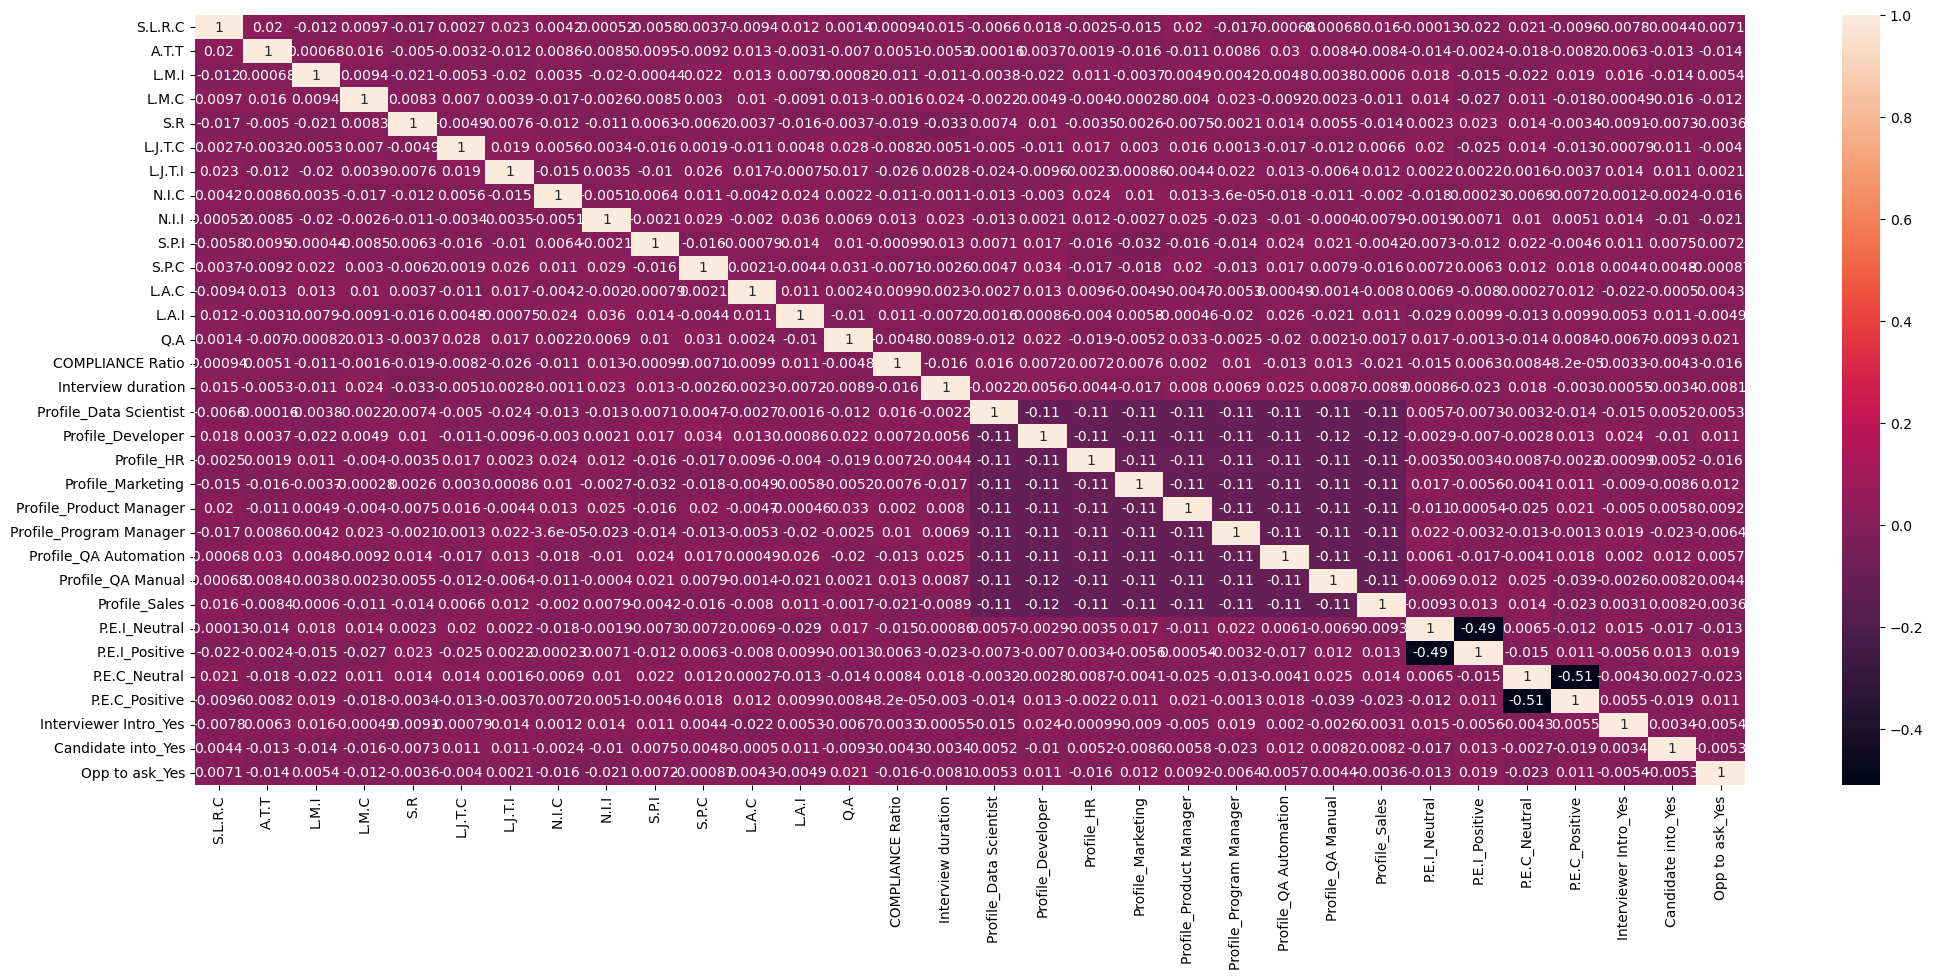

In [52]:
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(),annot=True)

## Now will build the RandomForest Model 

In [53]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)
confusion_matrix(y_train,y_train_pred2)

array([[1568,    0,    0],
       [   0, 1369,    0],
       [   0,    0, 1123]], dtype=int64)

In [54]:
confusion_matrix(y_test,y_test_pred2)

array([[695,  51,   1],
       [ 34, 445,  42],
       [  0,  45, 427]], dtype=int64)

In [55]:
print(classification_report(y_train,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

    Consider       1.00      1.00      1.00      1568
May Consider       1.00      1.00      1.00      1369
Not Consider       1.00      1.00      1.00      1123

    accuracy                           1.00      4060
   macro avg       1.00      1.00      1.00      4060
weighted avg       1.00      1.00      1.00      4060

              precision    recall  f1-score   support

    Consider       0.95      0.93      0.94       747
May Consider       0.82      0.85      0.84       521
Not Consider       0.91      0.90      0.91       472

    accuracy                           0.90      1740
   macro avg       0.89      0.90      0.90      1740
weighted avg       0.90      0.90      0.90      1740



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

### Now will Select the best features based on RandomForestClassifier

In [57]:
sfm=SelectFromModel(RandomForestClassifier(n_estimators=100))
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [58]:
sfm.get_support()

array([False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [59]:
X_train.columns[sfm.get_support()]

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration'], dtype='object')

In [60]:
imp_features=X_train.columns[sfm.get_support()]
len(imp_features)

5

In [61]:
imp_features

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration'], dtype='object')

In [62]:
new_X=X[imp_features]

In [63]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.3,random_state=42)

In [64]:
print('X_train=',X_train.shape,'X_test',X_test.shape,'y_train',y_train.shape,'y_test',y_test.shape)

X_train= (4060, 5) X_test (1740, 5) y_train (4060,) y_test (1740,)


In [65]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_train_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)
confusion_matrix(y_train,y_train_pred1)

array([[1537,   30,    1],
       [  25, 1323,   21],
       [   0,   24, 1099]], dtype=int64)

In [66]:
confusion_matrix(y_test,y_test_pred1)

array([[729,  17,   1],
       [  7, 498,  16],
       [  0,  11, 461]], dtype=int64)

In [67]:
print(classification_report(y_train,y_train_pred1))
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

    Consider       0.98      0.98      0.98      1568
May Consider       0.96      0.97      0.96      1369
Not Consider       0.98      0.98      0.98      1123

    accuracy                           0.98      4060
   macro avg       0.98      0.98      0.98      4060
weighted avg       0.98      0.98      0.98      4060

              precision    recall  f1-score   support

    Consider       0.99      0.98      0.98       747
May Consider       0.95      0.96      0.95       521
Not Consider       0.96      0.98      0.97       472

    accuracy                           0.97      1740
   macro avg       0.97      0.97      0.97      1740
weighted avg       0.97      0.97      0.97      1740



**The Model is very genralized because we have almost same accuracy on both train and test data**

## Now will check the Importance of the Features based on RandomForestClassifier

In [68]:
Rand = RandomForestClassifier(n_estimators = 150) 
random_forest = Rand.fit(X_train, y_train)

In [69]:
data = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': random_forest.feature_importances_*100}).\
                    sort_values('importance', ascending = False)

In [70]:
data

,feature,importance
1,L.J.T.C,66.573101
3,S.P.C,9.911979
0,L.M.C,9.626370
2,N.I.C,7.787558
4,Interview duration,6.100991


### Now will Build Different Models with different algorithm and campare with the different models and select the best model 

**a. Logistic Regression**

**b. AdaBoost**

**c. Naïve Bayes**

**d. KNN**

**e. SVM**

## AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

model3= AdaBoostClassifier()
model3.fit(X_train,y_train)
y_train_pred3=model3.predict(X_train)
y_test_pred3=model3.predict(X_test)
print(confusion_matrix(y_train,y_train_pred3))
print(confusion_matrix(y_test,y_test_pred3))
print(classification_report(y_train,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred3)*100)

[[1081  486    1]
 [  13 1329   27]
 [   0  127  996]]
[[510 236   1]
 [  6 496  19]
 [  1  45 426]]
              precision    recall  f1-score   support

    Consider       0.99      0.69      0.81      1568
May Consider       0.68      0.97      0.80      1369
Not Consider       0.97      0.89      0.93      1123

    accuracy                           0.84      4060
   macro avg       0.88      0.85      0.85      4060
weighted avg       0.88      0.84      0.84      4060

              precision    recall  f1-score   support

    Consider       0.99      0.68      0.81       747
May Consider       0.64      0.95      0.76       521
Not Consider       0.96      0.90      0.93       472

    accuracy                           0.82      1740
   macro avg       0.86      0.85      0.83      1740
weighted avg       0.87      0.82      0.83      1740

Accuracy_Score= 82.29885057471265


## Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

model4= GaussianNB()
model4.fit(X_train,y_train)
y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)
print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred4)*100)

[[1378  189    1]
 [ 194 1005  170]
 [   0  144  979]]
[[656  90   1]
 [ 56 380  85]
 [  0  68 404]]
              precision    recall  f1-score   support

    Consider       0.88      0.88      0.88      1568
May Consider       0.75      0.73      0.74      1369
Not Consider       0.85      0.87      0.86      1123

    accuracy                           0.83      4060
   macro avg       0.83      0.83      0.83      4060
weighted avg       0.83      0.83      0.83      4060

              precision    recall  f1-score   support

    Consider       0.92      0.88      0.90       747
May Consider       0.71      0.73      0.72       521
Not Consider       0.82      0.86      0.84       472

    accuracy                           0.83      1740
   macro avg       0.82      0.82      0.82      1740
weighted avg       0.83      0.83      0.83      1740

Accuracy_Score= 82.75862068965517


## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

model5= KNeighborsClassifier()
model5.fit(X_train,y_train)
y_train_pred5=model5.predict(X_train)
y_test_pred5=model5.predict(X_test)
print(confusion_matrix(y_train,y_train_pred5))
print(confusion_matrix(y_test,y_test_pred5))
print(classification_report(y_train,y_train_pred5))
print(classification_report(y_test,y_test_pred5))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred5)*100)

[[1528   39    1]
 [  49 1267   53]
 [   0   42 1081]]
[[704  42   1]
 [ 25 470  26]
 [  0  39 433]]
              precision    recall  f1-score   support

    Consider       0.97      0.97      0.97      1568
May Consider       0.94      0.93      0.93      1369
Not Consider       0.95      0.96      0.96      1123

    accuracy                           0.95      4060
   macro avg       0.95      0.95      0.95      4060
weighted avg       0.95      0.95      0.95      4060

              precision    recall  f1-score   support

    Consider       0.97      0.94      0.95       747
May Consider       0.85      0.90      0.88       521
Not Consider       0.94      0.92      0.93       472

    accuracy                           0.92      1740
   macro avg       0.92      0.92      0.92      1740
weighted avg       0.93      0.92      0.92      1740

Accuracy_Score= 92.35632183908045


## SVM

In [74]:
from sklearn.svm import SVC
model6= SVC()
model6.fit(X_train,y_train)
y_train_pred6=model6.predict(X_train)
y_test_pred6=model6.predict(X_test)
print(confusion_matrix(y_train,y_train_pred6))
print(confusion_matrix(y_test,y_test_pred6))
print(classification_report(y_train,y_train_pred6))
print(classification_report(y_test,y_test_pred6))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred6)*100)

[[1535   32    1]
 [  27 1319   23]
 [   0   21 1102]]
[[725  21   1]
 [  6 502  13]
 [  0  15 457]]
              precision    recall  f1-score   support

    Consider       0.98      0.98      0.98      1568
May Consider       0.96      0.96      0.96      1369
Not Consider       0.98      0.98      0.98      1123

    accuracy                           0.97      4060
   macro avg       0.97      0.97      0.97      4060
weighted avg       0.97      0.97      0.97      4060

              precision    recall  f1-score   support

    Consider       0.99      0.97      0.98       747
May Consider       0.93      0.96      0.95       521
Not Consider       0.97      0.97      0.97       472

    accuracy                           0.97      1740
   macro avg       0.97      0.97      0.97      1740
weighted avg       0.97      0.97      0.97      1740

Accuracy_Score= 96.7816091954023


## Now will Perform HyperTuningTechnique by using GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

# defining Parameter Range
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['linear']}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.970 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.977 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.970 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.977 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.970 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [76]:
# print best parameter after tuning

print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [77]:
from sklearn.svm import SVC
model7= SVC(C=0.1,gamma=1,kernel='linear')
model7.fit(X_train,y_train)
y_train_pred7=model7.predict(X_train)
y_test_pred7=model7.predict(X_test)
print(confusion_matrix(y_train,y_train_pred7))
print(confusion_matrix(y_test,y_test_pred7))
print(classification_report(y_train,y_train_pred7))
print(classification_report(y_test,y_test_pred7))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred7)*100)

[[1531   36    1]
 [  21 1323   25]
 [   0   18 1105]]
[[729  17   1]
 [  3 500  18]
 [  0  10 462]]
              precision    recall  f1-score   support

    Consider       0.99      0.98      0.98      1568
May Consider       0.96      0.97      0.96      1369
Not Consider       0.98      0.98      0.98      1123

    accuracy                           0.98      4060
   macro avg       0.97      0.98      0.98      4060
weighted avg       0.98      0.98      0.98      4060

              precision    recall  f1-score   support

    Consider       1.00      0.98      0.99       747
May Consider       0.95      0.96      0.95       521
Not Consider       0.96      0.98      0.97       472

    accuracy                           0.97      1740
   macro avg       0.97      0.97      0.97      1740
weighted avg       0.97      0.97      0.97      1740

Accuracy_Score= 97.183908045977


## Now will perform for the entire train and test data 

In [78]:
test.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [79]:
new_test=test.drop(['Interview Id','Candidate Id','Interviewer Id','S.L.R.I'],axis=1)
new_test.head(2)

,Profile,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,Product Manager,0.52,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,Product Manager,0.87,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes


In [80]:
new_test1=pd.get_dummies(data=new_test,columns=cat_val_test.isnull().columns,drop_first=True)

In [81]:
new_test1.head(2)

,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,0.52,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,24.0,49,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
1,0.87,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,99.0,24,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1


### Now will scale down the data and keep it in the same scale

# Performing Standard Scaler

In [82]:
scaled1=sc.transform(new_test1)
scaled_test=pd.DataFrame(scaled1,columns=new_test1.columns)
scaled_test.head()

,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration,Profile_Data Scientist,Profile_Developer,Profile_HR,Profile_Marketing,Profile_Product Manager,Profile_Program Manager,Profile_QA Automation,Profile_QA Manual,Profile_Sales,P.E.I_Neutral,P.E.I_Positive,P.E.C_Neutral,P.E.C_Positive,Interviewer Intro_Yes,Candidate into_Yes,Opp to ask_Yes
0,-1.582711,1.122570,-1.170468,-0.131033,-1.023739,-1.423717,-0.081362,-1.560289,-0.803615,0.678589,1.637198,-0.700452,1.484305,-0.300199,-0.917114,0.879375,-0.328845,-0.345339,-0.326264,-0.331414,3.026156,-0.329489,-0.332375,-0.334927,-0.334927,-0.697982,1.435509,-0.718292,-0.709211,1.004147,1.012492,0.980873
1,0.843477,-0.540618,-0.999878,-0.980705,1.556417,0.329697,-0.278067,1.275662,0.136992,-0.401330,1.355956,-1.628310,-0.262680,1.474077,1.696688,-1.000712,-0.328845,-0.345339,-0.326264,-0.331414,3.026156,-0.329489,-0.332375,-0.334927,-0.334927,-0.697982,1.435509,1.392191,-0.709211,-0.995871,1.012492,0.980873
2,-1.028154,-0.676389,1.558972,0.548705,-0.616346,-0.151633,-1.562441,0.120274,0.764062,0.089542,-1.376100,-0.236524,0.785511,-0.891625,-1.195920,-1.602339,-0.328845,-0.345339,-0.326264,-0.331414,-0.330452,-0.329489,3.008653,-0.334927,-0.334927,-0.697982,-0.696617,-0.718292,1.410018,1.004147,-0.987662,0.980873
3,-1.582711,1.088627,1.431029,-0.598352,-0.955840,0.295316,-0.341708,1.643285,1.495645,0.187716,-1.496632,0.459369,-1.136173,0.882651,0.546615,0.202544,-0.328845,-0.345339,3.065007,-0.331414,-0.330452,-0.329489,-0.332375,-0.334927,-0.334927,-0.697982,-0.696617,1.392191,-0.709211,-0.995871,-0.987662,0.980873
4,-1.097473,0.884972,-0.317518,1.483345,-1.499030,0.776645,-0.497915,1.643285,0.241503,0.924025,-1.094859,0.459369,-1.136173,0.882651,-0.115548,0.052137,-0.328845,-0.345339,3.065007,-0.331414,-0.330452,-0.329489,-0.332375,-0.334927,-0.334927,-0.697982,1.435509,-0.718292,1.410018,-0.995871,1.012492,0.980873


In [83]:
X_train.columns

Index(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration'], dtype='object')

In [84]:
X_test=scaled_test[['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration']]
X_test.head()

,L.M.C,L.J.T.C,N.I.C,S.P.C,Interview duration
0,-0.131033,-1.423717,-1.560289,1.637198,0.879375
1,-0.980705,0.329697,1.275662,1.355956,-1.000712
2,0.548705,-0.151633,0.120274,-1.376100,-1.602339
3,-0.598352,0.295316,1.643285,-1.496632,0.202544
4,1.483345,0.776645,1.643285,-1.094859,0.052137


In [85]:
X_train=new_X
X_train.head()

,L.M.C,L.J.T.C,N.I.C,S.P.C,Interview duration
0,0.548705,-0.713184,0.172792,-0.010072,-0.023067
1,-1.532992,-0.655882,-0.509937,0.190815,-0.323881
2,-0.216000,-1.125752,-0.614972,-0.532377,1.556206
3,0.973541,-0.403757,1.275662,1.114893,-0.173474
4,1.653279,0.455759,-1.612807,1.074715,1.706613


In [86]:
y_train=y

In [87]:
print('X_train',X_train.shape,'X_test',X_test.shape,'y_train',y_train.shape)

X_train (5800, 5) X_test (1200, 5) y_train (5800,)


In [88]:
from sklearn.model_selection import GridSearchCV

# defining Parameter Range
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001],'kernel':['linear']}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.2s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.2s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.972 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [89]:
# print best parameter after tuning

print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [90]:
model8= SVC(C=0.1,gamma=1,kernel='linear')
model8.fit(X_train,y_train)
y_train_pred8=model8.predict(X_train)
y_test_pred8=model8.predict(X_test)
print(confusion_matrix(y_train,y_train_pred8))
print(classification_report(y_train,y_train_pred8))

print('Accuracy_Score=',accuracy_score(y_train,y_train_pred8)*100)

[[2277   36    2]
 [  39 1812   39]
 [   0   32 1563]]
              precision    recall  f1-score   support

    Consider       0.98      0.98      0.98      2315
May Consider       0.96      0.96      0.96      1890
Not Consider       0.97      0.98      0.98      1595

    accuracy                           0.97      5800
   macro avg       0.97      0.97      0.97      5800
weighted avg       0.97      0.97      0.97      5800

Accuracy_Score= 97.44827586206897


In [91]:
actual_test_pred=pd.Series(y_test_pred8)
actual_test_pred.head()

0        Consider
1    May Consider
2    May Consider
3    Not Consider
4    Not Consider
dtype: object

In [92]:
df_sample = pd.read_csv('sample_IA_-_sample.csv')
df_name = pd.DataFrame(df_sample.values[:,:-1])
df_name.values


FileNotFoundError: [Errno 2] No such file or directory: 'sample_IA_-_sample.csv'

In [ ]:
Test_predicted = pd.concat([df_name,actual_test_pred],axis=1 )
Test_predicted

In [ ]:
Test_predicted.columns = ["Interview Id", "Status"]

In [ ]:
Test_predicted.columns

In [ ]:
Test_predicted.head()

In [ ]:
Test_predicted.to_csv('New_final_predicted_data.csv',index = False)